### *APPLICATION OF MACHINE LEARNING IN BIOLOGICAL SYSTEMS (ES60011)*
# **Project-6**
* #### Support  Vector  Machines  (SVM)
* #### Random  forest  (RF)
* ### Neural  network  (NN)

> ## 22CS30017 - Chandransh Singh

## 1. Data Preprocessing and Exploration

### 1. Import Library

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import time
import warnings
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import sigmoid_kernel
from sklearn.ensemble import RandomForestClassifier

### 2. Define paths

In [5]:
filepath = None
filepath = "breast cancer.csv"
df = pd.read_csv(filepath)

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# the target variable is the diagnosis column
# we will convert the diagnosis column to binary
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df['diagnosis'].value_counts()
df.drop('id', axis=1, inplace=True)

In [7]:
print(df.shape)
df.info()

(569, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se         

In [8]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
df.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

> we observe that the last column is unnamed and has empty values

In [10]:
# we observe that the last column is unnamed and has empty values
# we will drop it
df = df.drop(df.columns[-1], axis=1)
print(df.shape)

(569, 31)


> we notice that there are no null values

### Normalization
Ensures that the features are scaled to a consistent range, which can improve the performance of machine learning models.
* we normalize the data to bing all the values between [0,1]

In [11]:
scaler = MinMaxScaler()
labels = df['diagnosis']
features = df.drop('diagnosis', axis=1)
features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

df_normalized = pd.concat([labels, features], axis=1)
X = features
y = labels
print(X.shape, y.shape)

(569, 30) (569,)


### Visualize feature distributions
* **Objective**: Visualize the distribution of each feature in the normalized DataFrame `df_normalized` using histograms with KDE plots.
* **Workflow**:
    * **Set Theme**: Uses `sns.set_theme` to set the aesthetic style of the plots.
    * **Calculate Rows and Columns**: Determines the number of rows and columns needed for the grid of subplots.
    * **Create Subplots**: Uses ``plt.subplots`` to create a grid of subplots.
    * **Plot Distributions**: Iterates over each column in `df_normalized` and plots its distribution using sns.histplot.
    * **Remove Empty Subplots**: Deletes any unused subplots.
    * **Adjust Layout and Display**: Uses ``plt.tight_layout`` to adjust the layout and `plt.show` to display the figure.
* **Benefits**:
    * **Visualization**: Provides a clear and structured visualization of the distributions of all features in the DataFrame.
    * **Readability**: Ensures that the plots are readable and well-organized, making it easier to interpret the data.

* **Functions Used**:
    * `sns.set_theme`:
        * **Description**: Sets the aesthetic style of the plots.
        * **Usage in Code**: Used to set the theme to "whitegrid" for better readability.
    * `sns.histplot`:
        * **Description**: Plots a histogram with optional KDE (Kernel Density Estimate).
        * **Usage in Code**: Used to plot the distribution of each feature in the DataFrame.


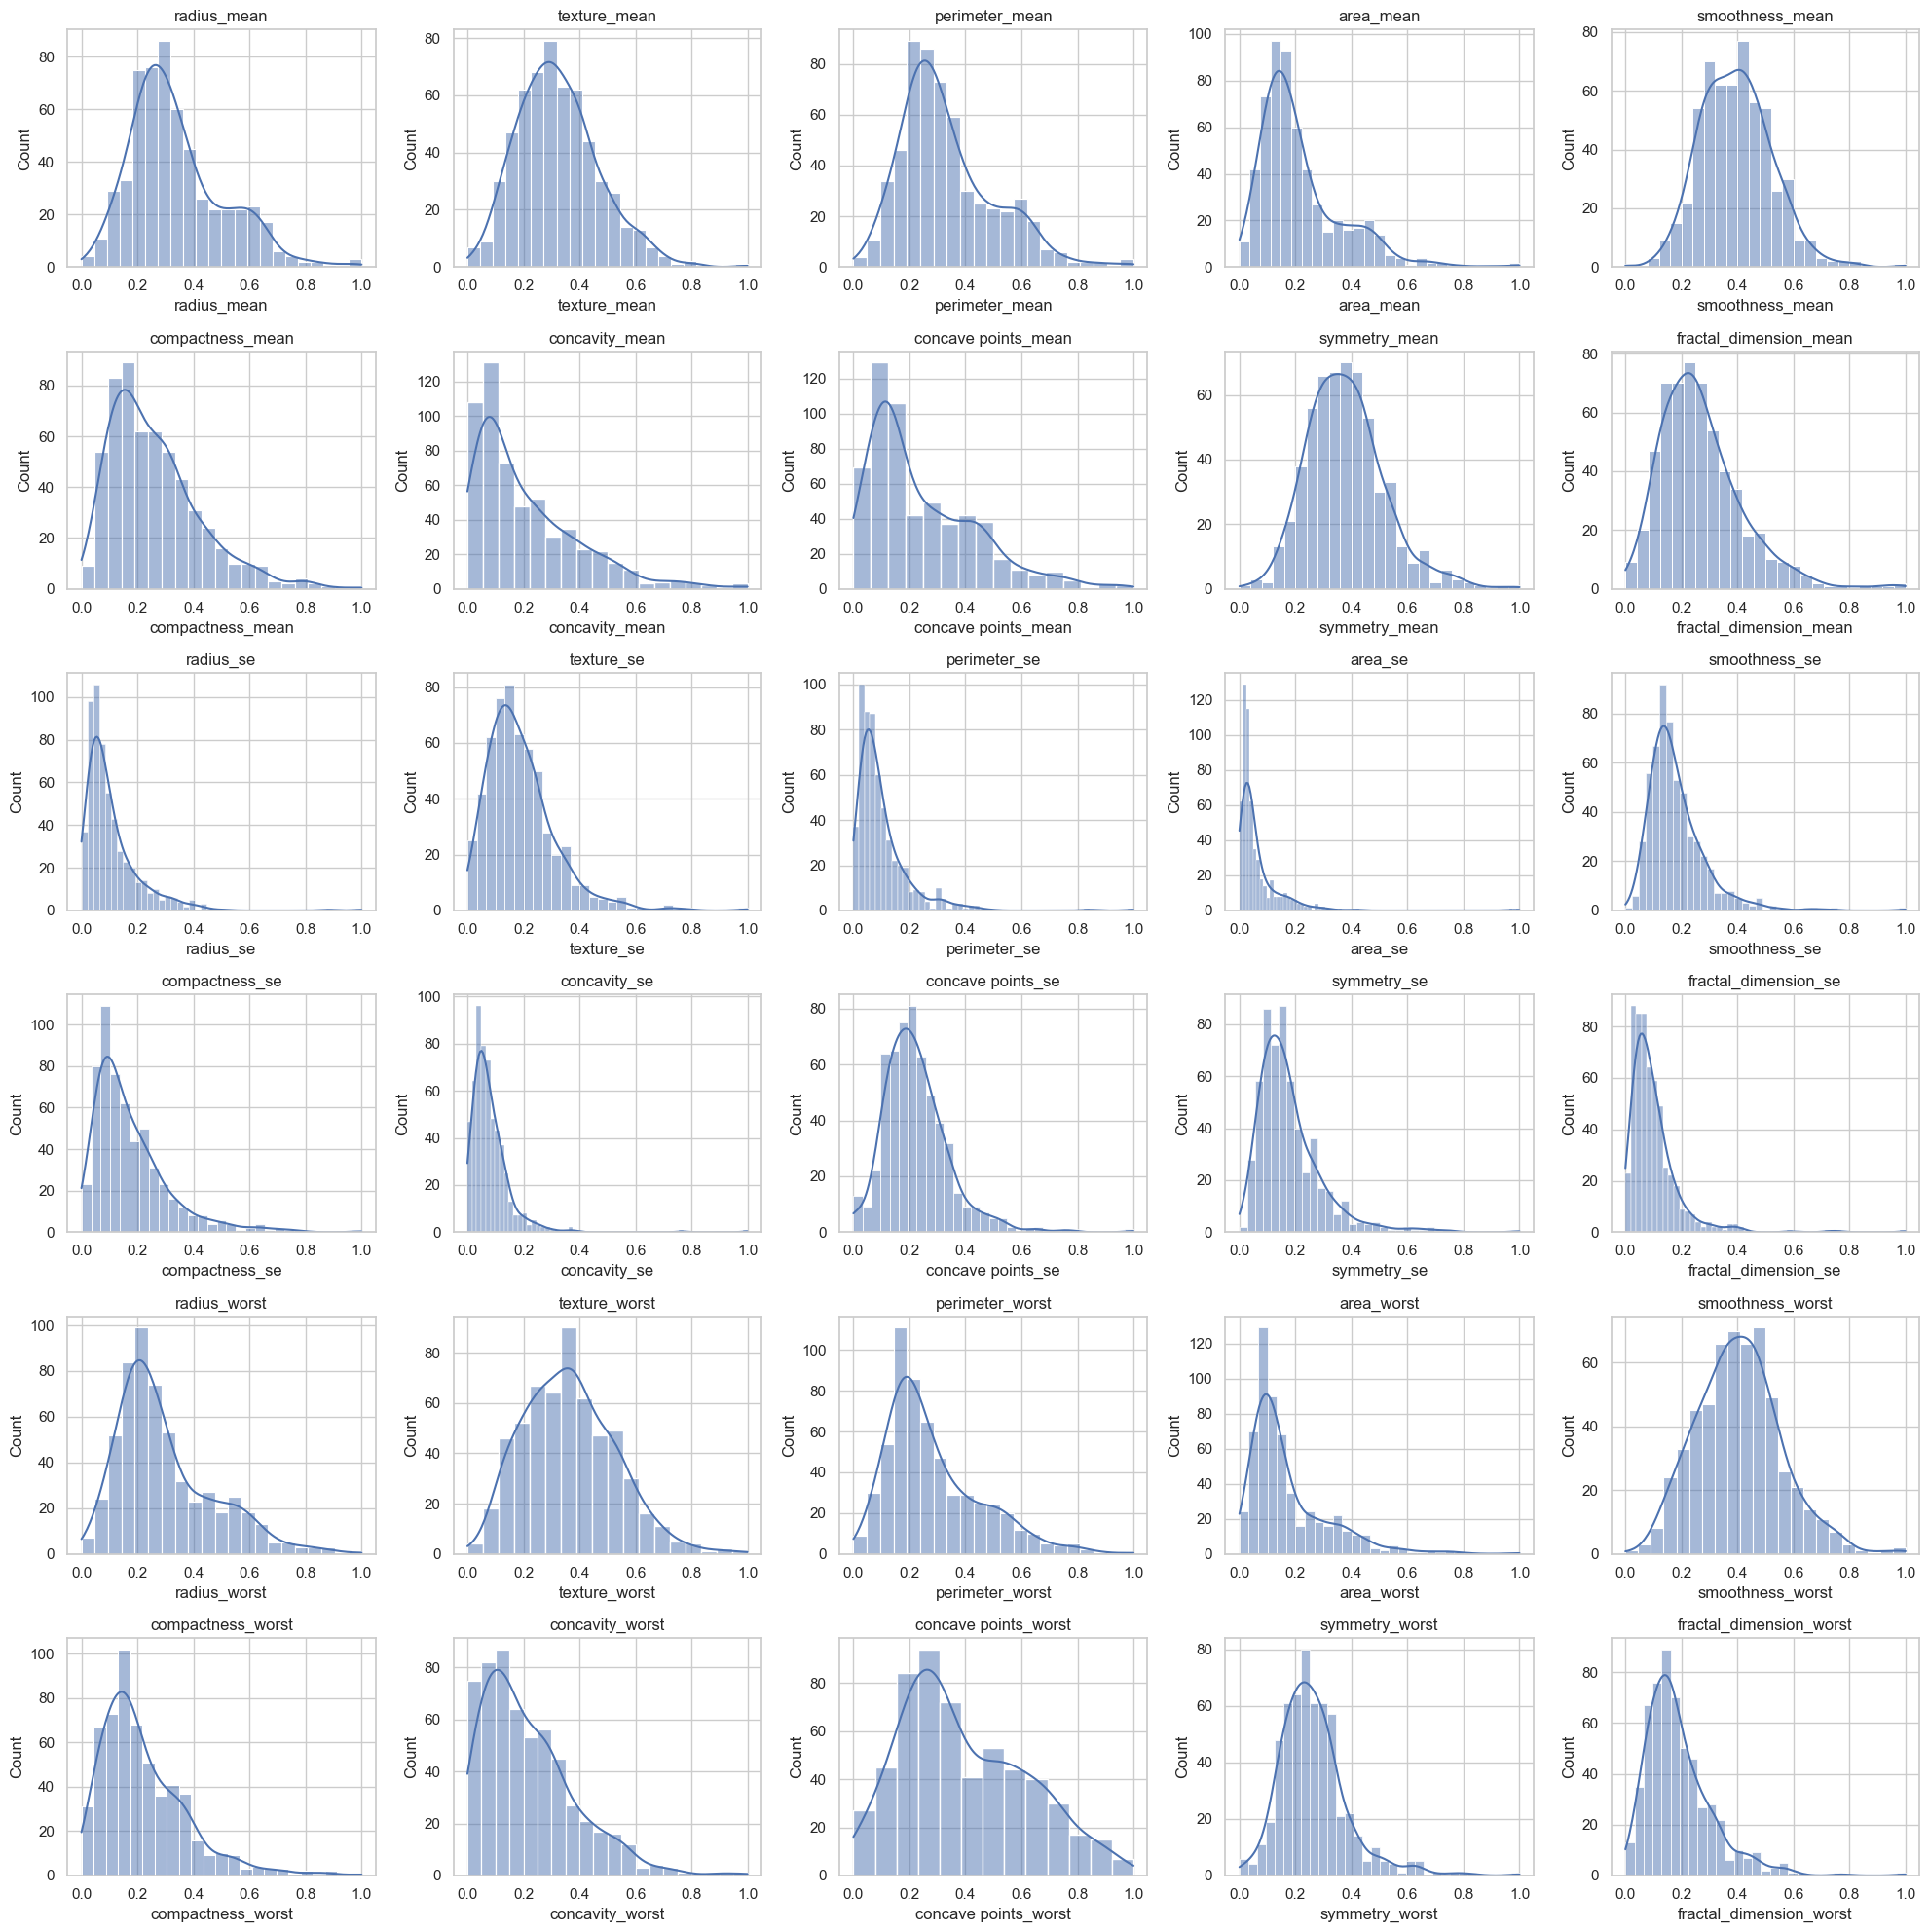

In [12]:
sns.set_theme(style="whitegrid")
num_features = features.select_dtypes(include=[np.number])

num_col = 5
num_row = (len(num_features.columns) + num_col - 1) / num_col

fig, axes = plt.subplots(nrows=int(num_row), ncols=num_col, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(num_features.columns):
    sns.histplot(data=num_features, x=col, kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

### Box plot
* **Visualizes the Distribution**
    * The boxplot shows the distribution of each feature, including the median, quartiles, and potential outliers.

* **Identifies Outliers**
    * Outliers are displayed as individual points outside the whiskers of the boxplot.
* **Compares Features**
    * By plotting all features in a single figure, we can easily compare their distributions and identify any features with significant outliers or skewness.


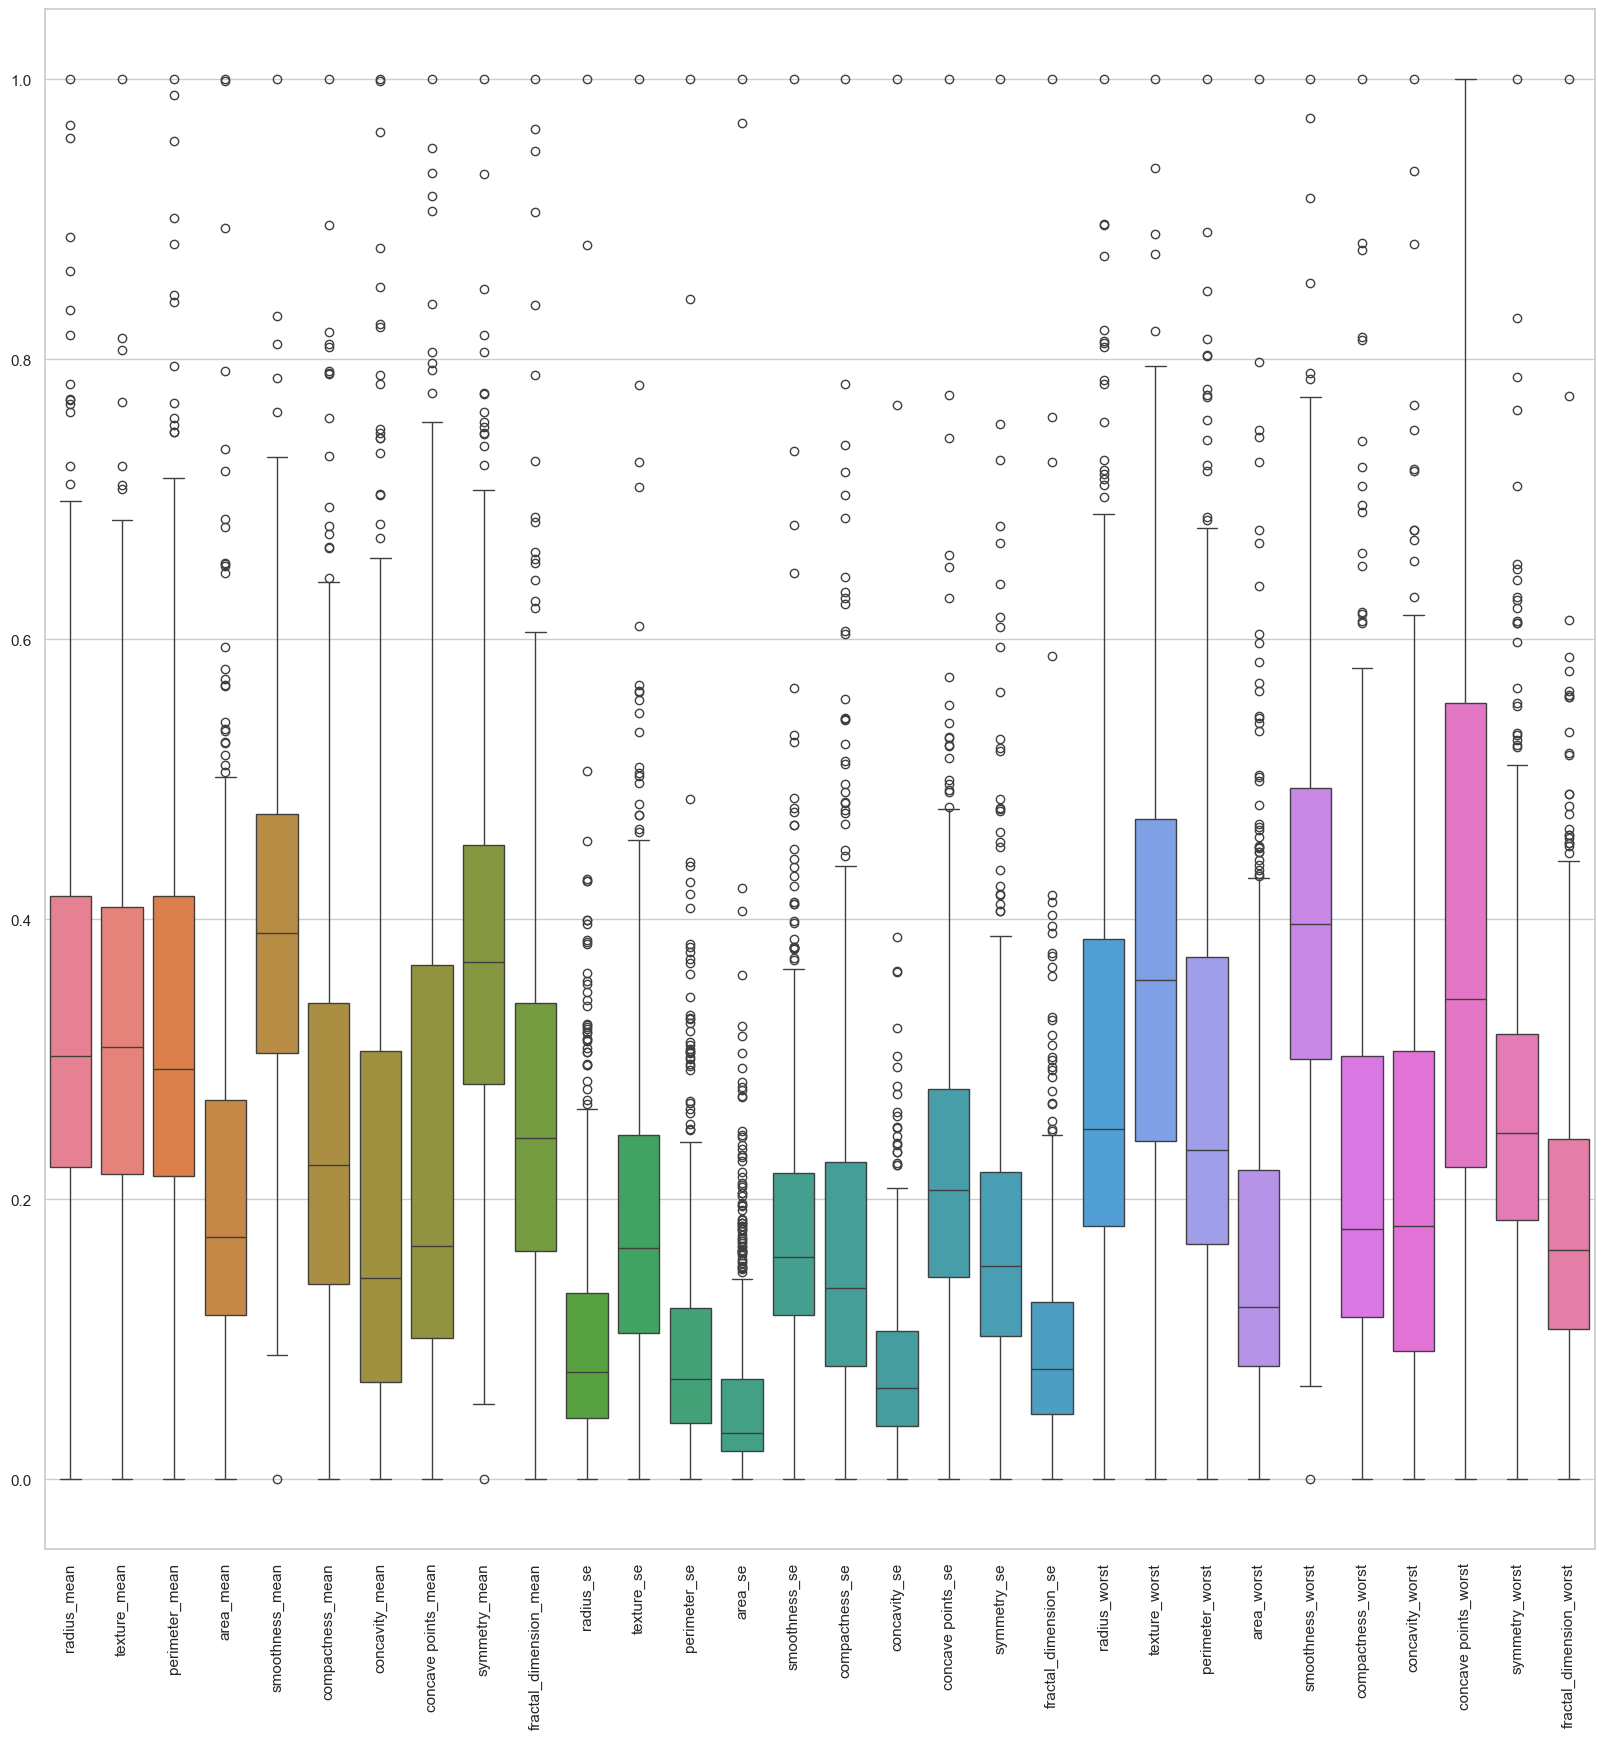

In [13]:
sns.set_theme(style="whitegrid")
pallete = sns.color_palette("Set2")

plt.figure(figsize=(20, 20))
sns.boxplot(data=features)
plt.xticks(rotation=90)
plt.show()

### Remove outliers

In [14]:
#remove outliers
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df

df_norm_outrem = remove_outliers(df_normalized)
print(df_norm_outrem.shape)
df_norm_outrem.head()

(398, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
6,1,0.533343,0.347311,0.523875,0.380276,0.379164,0.274891,0.264058,0.367793,0.370707,...,0.531839,0.416844,0.511928,0.349194,0.482269,0.223448,0.302236,0.663918,0.295289,0.187853
7,1,0.318472,0.376057,0.320710,0.184263,0.598267,0.445126,0.219447,0.297465,0.573737,...,0.324795,0.429638,0.299766,0.174941,0.622268,0.330753,0.213898,0.534708,0.321506,0.393939
10,1,0.427801,0.457558,0.407090,0.277540,0.265686,0.145114,0.077296,0.165159,0.236364,...,0.400569,0.582623,0.365506,0.237122,0.309912,0.124002,0.116534,0.342784,0.272620,0.193362
11,1,0.416442,0.276632,0.413309,0.270414,0.401462,0.336850,0.233224,0.328330,0.394949,...,0.444326,0.406716,0.428756,0.273742,0.451892,0.517711,0.316693,0.621993,0.438991,0.326381
13,1,0.419755,0.481569,0.414000,0.271135,0.283290,0.247899,0.232849,0.266600,0.397475,...,0.316969,0.416844,0.306738,0.169903,0.276894,0.160191,0.185463,0.384536,0.245220,0.051358


### Feature Engineering

* **PolynomialFeatures**:
    * **Description**: A transformer that generates polynomial features up to a specified degree.
    * **Parameters**:
        * `degree`: The degree of the polynomial features. In this case, `degree=2` generates features up to the second degree (squares and interaction terms).
        * `include_bias`: If False, the bias (intercept) term is not included in the output.

In [15]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df_norm_outrem.iloc[:, 1:])  # Exclude the first column

poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(df_norm_outrem.columns[1:]))
print(poly_df.shape)
poly_df.head()

(398, 495)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,concavity_worst^2,concavity_worst concave points_worst,concavity_worst symmetry_worst,concavity_worst fractal_dimension_worst,concave points_worst^2,concave points_worst symmetry_worst,concave points_worst fractal_dimension_worst,symmetry_worst^2,symmetry_worst fractal_dimension_worst,fractal_dimension_worst^2
0,0.533343,0.347311,0.523875,0.380276,0.379164,0.274891,0.264058,0.367793,0.370707,0.157119,...,0.091347,0.200660,0.089247,0.056776,0.440786,0.196047,0.124719,0.087195,0.055471,0.035289
1,0.318472,0.376057,0.320710,0.184263,0.598267,0.445126,0.219447,0.297465,0.573737,0.517060,...,0.045752,0.114373,0.068769,0.084263,0.285913,0.171912,0.210643,0.103366,0.126654,0.155188
2,0.427801,0.457558,0.407090,0.277540,0.265686,0.145114,0.077296,0.165159,0.236364,0.147641,...,0.013580,0.039946,0.031769,0.022533,0.117501,0.093450,0.066281,0.074322,0.052714,0.037389
3,0.416442,0.276632,0.413309,0.270414,0.401462,0.336850,0.233224,0.328330,0.394949,0.228728,...,0.100295,0.196981,0.139025,0.103363,0.386875,0.273049,0.203007,0.192713,0.143278,0.106524
4,0.419755,0.481569,0.414000,0.271135,0.283290,0.247899,0.232849,0.266600,0.397475,0.072030,...,0.034397,0.071317,0.045479,0.009525,0.147868,0.094296,0.019749,0.060133,0.012594,0.002638


### Select K best

We perform feature selection using the SelectKBest method and evaluate the performance of a RandomForestClassifier on the selected features. The code includes steps for splitting the dataset into training and testing sets, training the classifier, and determining the optimal number of features (k) using cross-validation.

* Libraries and Functions Used
    1. `sklearn.model_selection.train_test_split`

        * **Purpose**: Splits arrays or matrices into random train and test subsets.
        * **Usage in Code**: Used to split the dataset into training and testing sets.
    1. `sklearn.ensemble.RandomForestClassifier`

        * **Purpose**: A meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
        * **Usage in Code**: Used to train a RandomForestClassifier on the selected features.
    1. `sklearn.feature_selection.SelectKBest`

        * **Purpose**: Selects the k highest scoring features based on a scoring function.
        * **Usage in Code**: Used to select the top k features based on the ANOVA F-value between label/feature for classification tasks.
    1. `sklearn.feature_selection.f_classif`

        * **Purpose**: Computes the ANOVA F-value for the provided sample.
        * **Usage in Code**: Used as the scoring function for SelectKBest.
    1. `sklearn.metrics.accuracy_score`

        * **Purpose**: Computes the accuracy classification score.
        * **Usage in Code**: Used to evaluate the accuracy of the classifier.
    1. `sklearn.model_selection.cross_val_score`

        * **Purpose**: Evaluates a score by cross-validation.
        * **Usage in Code**: Used to perform cross-validation and compute the mean cross-validation score.

In [16]:
X = poly_df
y = df_norm_outrem['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shapes of the datasets before feature selection")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

optimal_k = 30
print(f"\nOptimal k: {optimal_k}")

selector = SelectKBest(f_classif, k=optimal_k)

X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nShapes of the datasets after feature selection")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# print the best features
mask = selector.get_support()
selected_features = X.columns[mask]
print(selected_features)
print(f"Number of selected features: {len(selected_features)}")

Shapes of the datasets before feature selection
X_train shape: (318, 495)
X_test shape: (80, 495)
y_train shape: (318,)
y_test shape: (80,)

Optimal k: 30

Shapes of the datasets after feature selection
X_train shape: (318, 30)
X_test shape: (80, 30)
y_train shape: (318,)
y_test shape: (80,)
Index(['area_worst', 'radius_mean concave points_mean',
       'radius_mean concave points_worst', 'texture_mean concave points_mean',
       'perimeter_mean concave points_mean',
       'perimeter_mean concave points_worst', 'area_mean concave points_worst',
       'smoothness_mean area_worst', 'compactness_mean area_worst',
       'concavity_mean radius_worst', 'concavity_mean perimeter_worst',
       'concavity_mean area_worst', 'concave points_mean radius_worst',
       'concave points_mean texture_worst',
       'concave points_mean perimeter_worst', 'concave points_mean area_worst',
       'concave points_mean concave points_worst',
       'area_se concave points_worst', 'radius_worst perimet

### Checking for any correlation between different features using heatmap

* Functions used:
    * `DataFrame.corr`:
        * **Description**: Computes the pairwise correlation of columns, excluding `NaN` values.
        * **Usage in Code**: Used to calculate the correlation matrix of the DataFrame `df_normalized`.

    * `sns.heatmap`:
        * **Description**: Draws a heatmap of the correlation matrix.
        * **Usage in Code**: Used to visualize the correlation matrix.

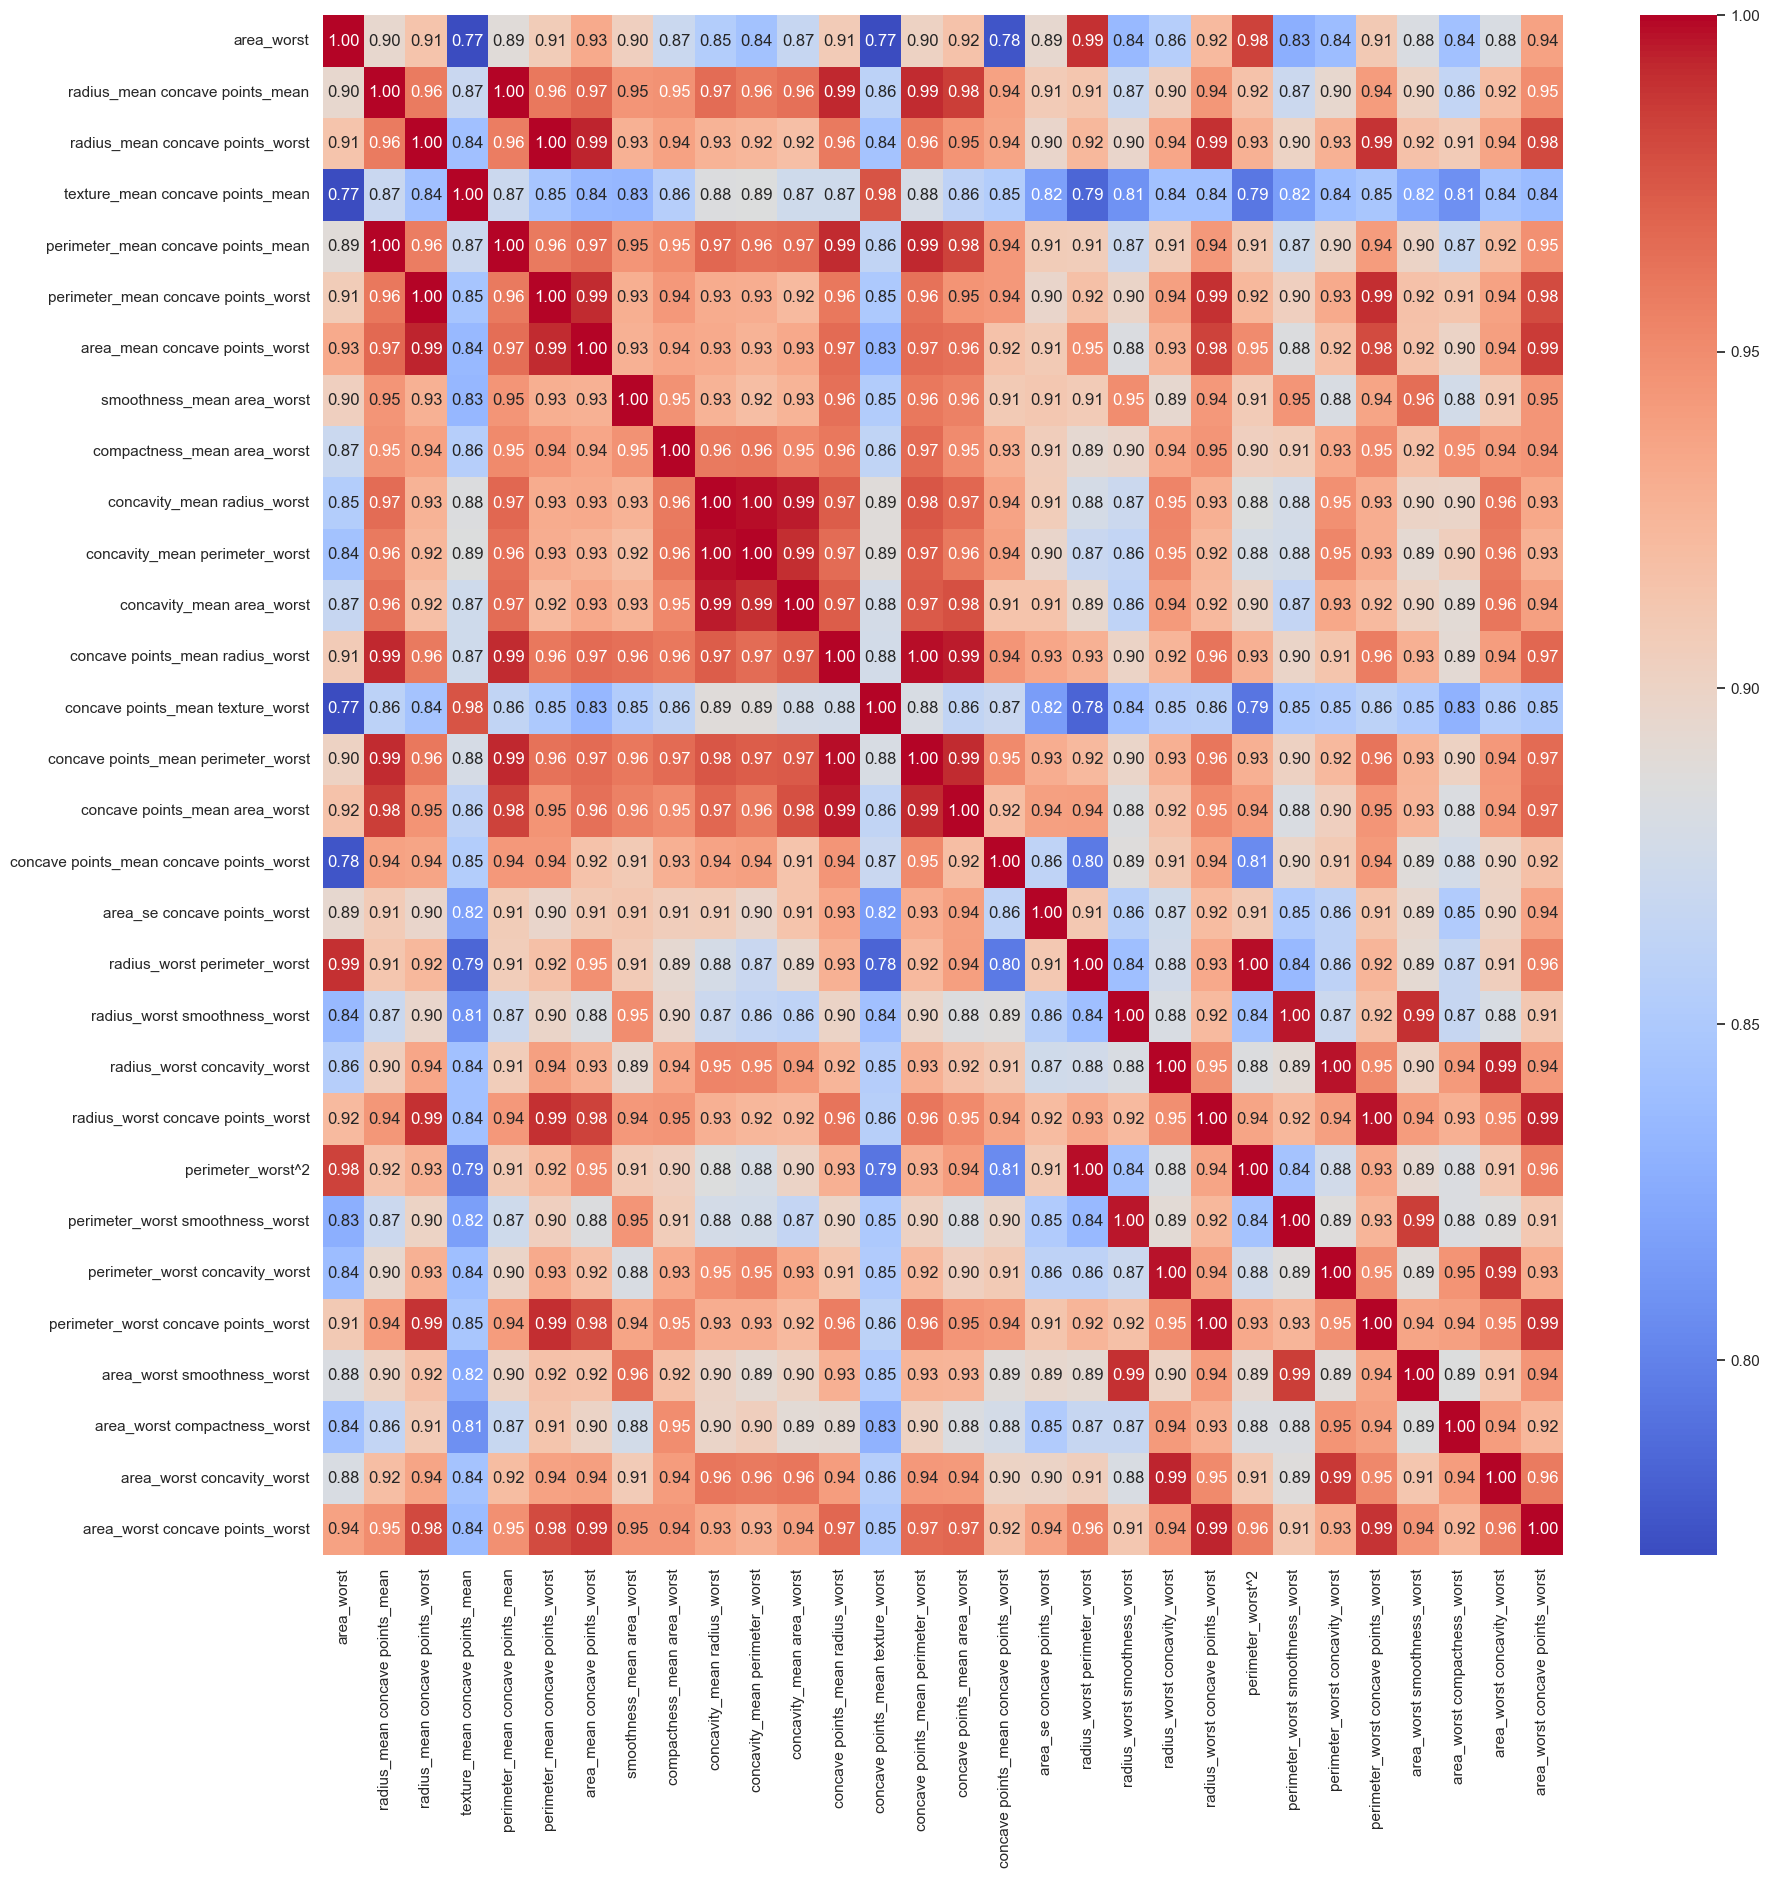

In [17]:
# correlation matrix on selected features
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 20))
corr = X[selected_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [18]:
# make a df of the selected features 
selected_features_df = pd.DataFrame(X, columns=selected_features)
print(selected_features_df.shape)
selected_features_df.head()

(398, 30)


,area_worst,radius_mean concave points_mean,radius_mean concave points_worst,texture_mean concave points_mean,perimeter_mean concave points_mean,perimeter_mean concave points_worst,area_mean concave points_worst,smoothness_mean area_worst,compactness_mean area_worst,concavity_mean radius_worst,...,radius_worst concavity_worst,radius_worst concave points_worst,perimeter_worst^2,perimeter_worst smoothness_worst,perimeter_worst concavity_worst,perimeter_worst concave points_worst,area_worst smoothness_worst,area_worst compactness_worst,area_worst concavity_worst,area_worst concave points_worst
0,0.349194,0.196160,0.354096,0.127739,0.192678,0.347810,0.252472,0.132402,0.095990,0.140436,...,0.160741,0.353097,0.262070,0.246887,0.154723,0.339878,0.168405,0.078027,0.105539,0.231836
1,0.174941,0.094734,0.170290,0.111864,0.095400,0.171486,0.098527,0.104661,0.077871,0.071275,...,0.069473,0.173671,0.089860,0.186535,0.064119,0.160287,0.108860,0.057862,0.037419,0.093542
2,0.237122,0.070655,0.146643,0.075570,0.067235,0.139544,0.095136,0.063000,0.034410,0.030962,...,0.046680,0.137309,0.133595,0.113275,0.042594,0.125290,0.073487,0.029404,0.027633,0.081281
3,0.273742,0.136730,0.259024,0.090826,0.135702,0.257076,0.168195,0.109897,0.092210,0.103627,...,0.140715,0.276368,0.183832,0.193752,0.135784,0.266684,0.123702,0.141719,0.086692,0.170265
4,0.169903,0.111907,0.161411,0.128387,0.110373,0.159198,0.104261,0.048132,0.042119,0.073806,...,0.058786,0.121886,0.094088,0.084934,0.056889,0.117952,0.047045,0.027217,0.031511,0.065334


### Removing Highly Correlated Features

* **Objective**: Remove features that have a high correlation with each other to reduce multicollinearity.
* **Workflow**:
    * **Calculate Correlation Matrix**: Compute the correlation matrix of the features.
    * **Identify Highly Correlated Features**: Identify pairs of features with a correlation coefficient above a certain threshold (e.g., 0.9).
    * **Remove Features**: Remove one feature from each pair of highly correlated features.
* **Benefits**:
    * **Reduce Multicollinearity**: Helps in reducing multicollinearity, which can improve the performance and interpretability of machine learning models.
    * **Simplify Model**: Reduces the number of features, simplifying the model and potentially improving generalization.


In [19]:
# remove highly correlated features
def remove_correlated_features(data, threshold):
    corr_matrix = data.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return to_drop

to_drop = remove_correlated_features(selected_features_df, 0.95)
print('Highly correlated features:', to_drop)

selected_features_df = selected_features_df.drop(to_drop, axis=1)
X = selected_features_df
print(X.shape)
selected_features_df.head()

Highly correlated features: ['radius_mean concave points_worst', 'perimeter_mean concave points_mean', 'perimeter_mean concave points_worst', 'area_mean concave points_worst', 'compactness_mean area_worst', 'concavity_mean radius_worst', 'concavity_mean perimeter_worst', 'concavity_mean area_worst', 'concave points_mean radius_worst', 'concave points_mean texture_worst', 'concave points_mean perimeter_worst', 'concave points_mean area_worst', 'concave points_mean concave points_worst', 'radius_worst perimeter_worst', 'radius_worst concavity_worst', 'radius_worst concave points_worst', 'perimeter_worst^2', 'perimeter_worst smoothness_worst', 'perimeter_worst concavity_worst', 'perimeter_worst concave points_worst', 'area_worst smoothness_worst', 'area_worst concavity_worst', 'area_worst concave points_worst']
(398, 7)


,area_worst,radius_mean concave points_mean,texture_mean concave points_mean,smoothness_mean area_worst,area_se concave points_worst,radius_worst smoothness_worst,area_worst compactness_worst
0,0.349194,0.196160,0.127739,0.132402,0.058416,0.256490,0.078027
1,0.174941,0.094734,0.111864,0.104661,0.044101,0.202110,0.057862
2,0.237122,0.070655,0.075570,0.063000,0.021581,0.124141,0.029404
3,0.273742,0.136730,0.090826,0.109897,0.055018,0.200787,0.141719
4,0.169903,0.111907,0.128387,0.048132,0.021387,0.087767,0.027217


### Train - test split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(318, 7) (80, 7) (318,) (80,)


## 2. SVM analysis


1. ### Linear Kernel
	* **Mathematical Expression**:  K(x,y)=x⋅y
	* **Explanation**: The linear kernel computes the inner product between two vectors. It is most suitable when the data is linearly separable or when the dataset's dimensionality is already high.
	* **Use Case**: Useful for high-dimensional space where adding non-linearity might lead to overfitting. It is simple and computationally efficient.
	* **Interpretation**: Each feature has a direct and proportional influence on the decision boundary.
2. ### Polynomial Kernel
	* **Mathematical Expression**: K(x,y)=(γx⋅y+r)<sup>d</sup>
		* γ (gamma): Scaling parameter.
		* r: Coefficient that allows for independent control of polynomial terms.
		* d: Degree of the polynomial.

	* **Explanation**: This kernel represents the similarity as a polynomial combination of the input features. It can model more complex relationships.
	* **Use Case**: Used when the relationship between data points is not linear but can be expressed as a polynomial relationship.
	* **Interpretation**: Higher degrees allow more complex boundaries but may increase the risk of overfitting.
3. ### Radial Basis Function (RBF) Kernel / Gaussian Kernel
	* **Mathematical Expression**: K(x,y)=exp(−γ∣∣x−y∣∣<sup>2</sup>)
		* γ: Controls the spread of the kernel (higher γ leads to a tighter fit).
	* **Explanation**: This is one of the most commonly used kernels. It measures similarity based on the distance between vectors in the feature space.
	* **Use Case**: Effective when there is no prior knowledge about the data's distribution. It can capture non-linear patterns well.
	* **Interpretation**: Points close in space have a high similarity (close to 1), while distant points have low similarity (close to 0).
4. ### Sigmoid Kernel
	* **Mathematical Expression**: K(x,y)=tanh(γx⋅y+r)
		* γ: Scaling parameter.
		* r: Coefficient to shift the curve.
	* **Explanation**: The sigmoid kernel function is inspired by the neural activation function and behaves like a two-layer perceptron. It can be used for non-linear decision boundaries.
	* **Use Case**: Used in situations where SVMs resemble neural network behavior, but it may not satisfy the Mercer's condition in some cases (leading to non-positive definite kernels).
	* **Interpretation**: The output is bounded between -1 and 1, resembling the behavior of logistic functions in neural networks.
5. ### Custom Kernel (Sigmoid Example)
	* **Mathematical Expression**: Custom implementation in the provided code:
		```
		def sigmoid_custom_kernel(X, Y):
			return sigmoid_kernel(X, Y, gamma=0.1, coef0=1.0)
		```
	* Explanation: This implementation allows defining a custom behavior for kernel calculations, such as specific parameter tuning for particular datasets.
	* Use Case: Provides flexibility to experiment with tailored non-linear transformations for data.
	* Interpretation: Tailoring γ and coef0 can adjust the kernel's sensitivity to the data's feature interactions.

### SVM with a Linear Kernel 


Time taken to train:  0.00368499755859375
Time taken to predict:  0.0012629032135009766
Accuracy:  0.9
Classification Report:                precision    recall  f1-score   support

           0       0.87      1.00      0.93        55
           1       1.00      0.68      0.81        25

    accuracy                           0.90        80
   macro avg       0.94      0.84      0.87        80
weighted avg       0.91      0.90      0.89        80

ROC AUC Score:  0.8400000000000001
Time taken for cross validation:  0.0165860652923584
Cross Validation Scores:  [0.96491228 0.98245614 0.98245614 0.96491228 0.98230088]
Mean Accuracy:  0.9754075454122031


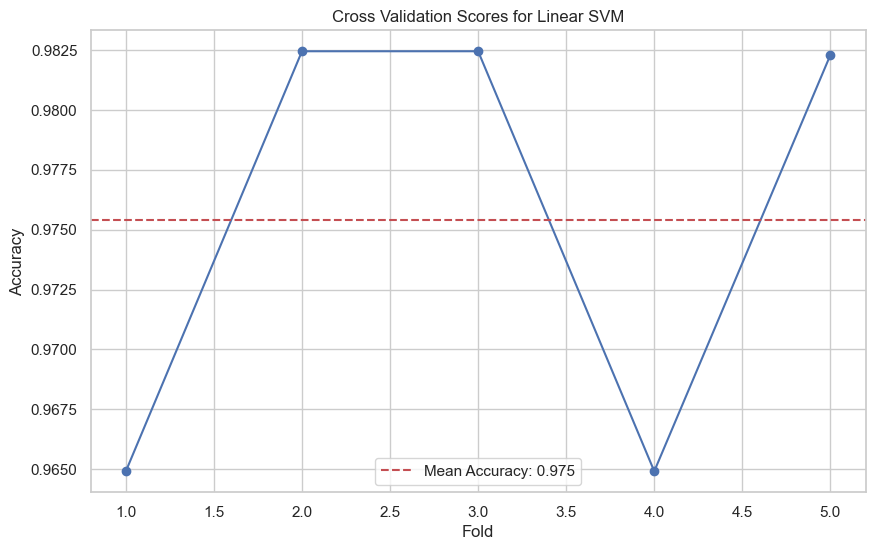

In [21]:
# apply linear kernel svm
# training time
start_train = time.time()
model = SVC(kernel='linear')
model.fit(X_train, y_train)
end_train = time.time()
print("Time taken to train: ", end_train - start_train)

# testing time 
start_test = time.time()
y_pred = model.predict(X_test)
end_test = time.time()
print("Time taken to predict: ", end_test - start_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: ", classification_report(y_test, y_pred))
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))

# use cross validation
# training time
start_train = time.time()
model = SVC(kernel='linear')
scores = cross_val_score(model, features, labels, cv=5)
end_train = time.time()
print("Time taken for cross validation: ", end_train - start_train)
print("Cross Validation Scores: ", scores)
print("Mean Accuracy: ", scores.mean())

# plot cross validation results
plt.figure(figsize=(10,6))
plt.plot(range(1,6), scores, marker='o')
plt.axhline(y=scores.mean(), color='r', linestyle='--', label=f'Mean Accuracy: {scores.mean():.3f}')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation Scores for Linear SVM')
plt.grid(True)
plt.legend()
plt.show()

### Scalability and Efficiency

* **Stochastic Gradient Descent (SGD):**
    * **Overview**: Instead of computing gradients on the entire dataset (like in batch gradient descent), SGD updates the model parameters for each data point (or a small subset), reducing memory usage and speeding up convergence.
    * **Benefits**: Lower memory requirement, faster convergence, and efficient for large datasets.
    * **Drawbacks**: Can be noisy due to single-sample updates, so often requires more epochs to reach an optimal solution.

* **Mini-Batch Gradient Descent:**
    * **Overview**: This method divides the dataset into small batches, then updates the model parameters after each batch, reducing computational load per update.
    * **Benefits**: Balances between the stability of batch gradient descent and the speed of SGD, ideal for large datasets.
    * **Drawbacks**: Can still be slower than SGD, and tuning batch size is crucial for optimal performance.

## 3. SVM with Polynomial, RBF, and Custom Kernels

### Polynomial Kernel

1. **Parameter Grid Definition**:
    * `param_grid_poly` defines the hyperparameters to be tuned: `C` (regularization parameter) and `degree` (polynomial degree).
2. **Grid Search Setup**:
    * An `SVC` estimator with a polynomial kernel is created.
    * `GridSearchCV` is used to perform a grid search over the specified parameter grid with 5-fold cross-validation (`cv=5`).
3. **Model Training**:
    * The grid search is fitted to the training data (`X_train_selected`, `y_train`).
4. **Best Parameters and Evaluation**:
    * The best hyperparameters found by the grid search are printed.
    * Predictions are made on the test data (X_test_selected).
    * The accuracy, classification report, and AUC score of the model with the best parameters are printed.
5. **Results Comparison**:
    * The mean test scores for different parameter combinations are printed.
6. **Plotting Mean Test Scores**:
    * A scatter plot is created to visualize the mean test scores for different polynomial degrees.
    * Different colors are used to highlight different `C` values.
    * A legend is created to indicate the `C` values.

Best Polynomial Kernel Parameters: {'C': 1, 'degree': 2, 'kernel': 'poly'}
Polynomial Kernel Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        55
           1       1.00      0.84      0.91        25

    accuracy                           0.95        80
   macro avg       0.97      0.92      0.94        80
weighted avg       0.95      0.95      0.95        80

AUC Score: 0.9199999999999999
Mean Test Score: 0.97 for Parameters: {'C': 0.1, 'degree': 2, 'kernel': 'poly'}
Mean Test Score: 0.98 for Parameters: {'C': 0.1, 'degree': 3, 'kernel': 'poly'}
Mean Test Score: 0.98 for Parameters: {'C': 0.1, 'degree': 4, 'kernel': 'poly'}
Mean Test Score: 0.98 for Parameters: {'C': 1, 'degree': 2, 'kernel': 'poly'}
Mean Test Score: 0.98 for Parameters: {'C': 1, 'degree': 3, 'kernel': 'poly'}
Mean Test Score: 0.98 for Parameters: {'C': 1, 'degree': 4, 'kernel': 'poly'}
Mean Test Score: 0.98 for Parameters:

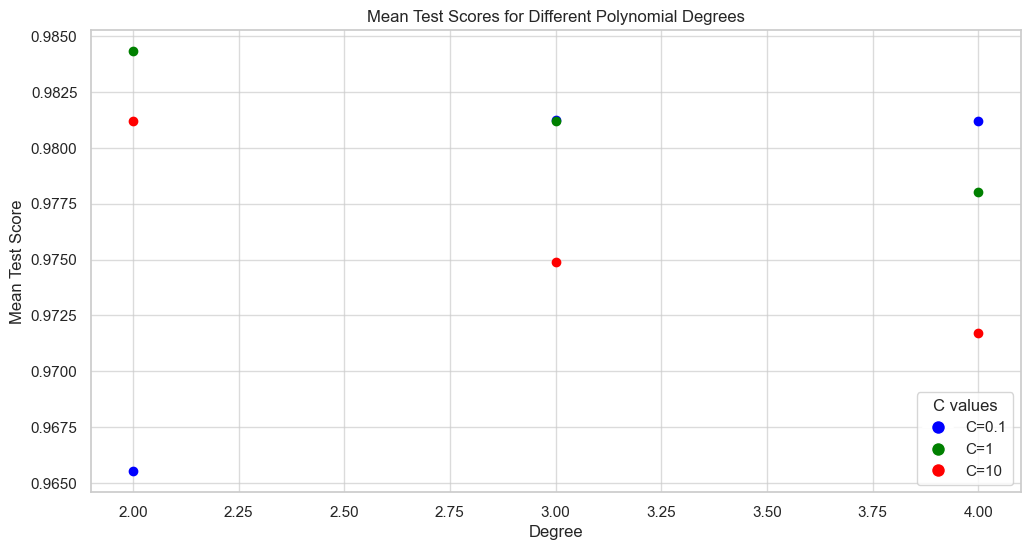

In [22]:
# Parameter grid for Polynomial Kernel
param_grid_poly = {
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],  # Polynomial degrees
    'kernel': ['poly'],
}

# Polynomial Kernel SVM with Grid Search
poly_svc = SVC()
grid_poly = GridSearchCV(estimator=poly_svc, param_grid=param_grid_poly, scoring='accuracy', cv=5)
grid_poly.fit(X_train, y_train)

# Best parameters and evaluation
print(f"Best Polynomial Kernel Parameters: {grid_poly.best_params_}")
y_pred_poly = grid_poly.predict(X_test)
print(f"Polynomial Kernel Accuracy: {accuracy_score(y_test, y_pred_poly):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_poly))
print("AUC Score:", roc_auc_score(y_test, y_pred_poly))

# Comparing results for different degrees
results = grid_poly.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Mean Test Score: {mean_score:.2f} for Parameters: {params}")

# Plotting mean test scores for different polynomial degrees
mean_scores = results['mean_test_score']
degrees = [params['degree'] for params in results['params']]
C_values = [params['C'] for params in results['params']]

plt.figure(figsize=(12, 6))

# Highlight different C values with different colors
colors = {0.1: 'blue', 1: 'green', 10: 'red'}
for i, (degree, mean_score, C_value) in enumerate(zip(degrees, mean_scores, C_values)):
    plt.scatter(degree, mean_score, color=colors[C_value], label=f'C={C_value}' if i == 0 else "")

# Create a legend for C values
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'C={C_value}') for C_value, color in colors.items()]
plt.legend(handles=handles, title='C values')

plt.title('Mean Test Scores for Different Polynomial Degrees')
plt.xlabel('Degree')
plt.ylabel('Mean Test Score')
plt.grid(True, alpha=0.7)
plt.show()



### RBF Kernel

1. **Parameter Grid Definition**:
    * `param_grid_rbf` defines the hyperparameters to be tuned: `C` (regularization parameter) and `gamma` (kernel coefficient).

2. **Grid Search Setup**:
    * An `SVC` estimator with an RBF kernel is created.
    * `GridSearchCV` is used to perform a grid search over the specified parameter grid with 5-fold cross-validation (`cv=5`).
3. **Model Training**:
    * The grid search is fitted to the training data (`X_train`, `y_train`).
4. **Best Parameters and Evaluation**:
    * The best hyperparameters found by the grid search are printed.
    * Predictions are made on the test data (`X_test`).
    * The accuracy, classification report, and AUC score of the model with the best parameters are printed.
5. **Results Comparison**:
    * The mean test scores for different parameter combinations are printed.
6. **Plotting Mean Test Scores**:
    * A scatter plot is created to visualize the mean test scores for different `gamma` values.
    * Different colors are used to highlight different `C` values.
    * A legend is created to indicate the `C` values.


Best RBF Kernel Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
RBF Kernel Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        55
           1       1.00      0.80      0.89        25

    accuracy                           0.94        80
   macro avg       0.96      0.90      0.92        80
weighted avg       0.94      0.94      0.94        80

AUC Score: 0.9
Mean Test Score: 0.77 for Parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
Mean Test Score: 0.77 for Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Mean Test Score: 0.78 for Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Mean Test Score: 0.77 for Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Mean Test Score: 0.79 for Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Mean Test Score: 0.95 for Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Mean Test Score: 0.79 for Parameters: {'C': 10, 'gamma': 0.01, 'kerne

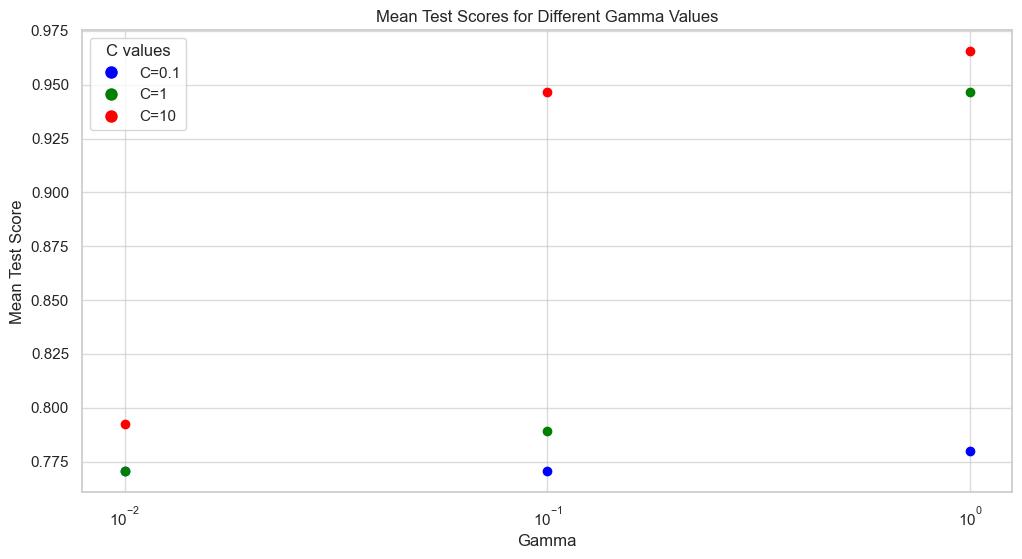

In [23]:
# parameter grid for RBF Kernel
param_grid_rbf = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf'],
}

# RBF Kernel SVM with Grid Search
rbf_svc = SVC()
grid_rbf = GridSearchCV(estimator=rbf_svc, param_grid=param_grid_rbf, scoring='accuracy', cv=5)
grid_rbf.fit(X_train, y_train)

# Best parameters and evaluation
print(f"Best RBF Kernel Parameters: {grid_rbf.best_params_}")
y_pred_rbf = grid_rbf.predict(X_test)
print(f"RBF Kernel Accuracy: {accuracy_score(y_test, y_pred_rbf):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))
print("AUC Score:", roc_auc_score(y_test, y_pred_rbf))

# Comparing results for different gamma values
results = grid_rbf.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Mean Test Score: {mean_score:.2f} for Parameters: {params}")


# Plotting mean test scores for different gamma values
mean_scores = results['mean_test_score']
gammas = [params['gamma'] for params in results['params']]
C_values = [params['C'] for params in results['params']]
colors = {0.1: 'blue', 1: 'green', 10: 'red'}

plt.figure(figsize=(12, 6))

for i, (gamma, mean_score, C_value) in enumerate(zip(gammas, mean_scores, C_values)):
    plt.scatter(gamma, mean_score, color=colors[C_value], label=f'C={C_value}' if i == 0 else "")

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'C={C_value}') for C_value, color in colors.items()]
plt.legend(handles=handles, title='C values')
plt.title('Mean Test Scores for Different Gamma Values')
plt.xlabel('Gamma')
plt.ylabel('Mean Test Score')
plt.xscale('log')
plt.grid(True, alpha=0.7)
plt.show()



### Custom Kernel
* #### Sigmoid kernel

1. **Custom Kernel Function**:
    * `sigmoid_custom_kernel` is defined using the sigmoid_kernel function with specific gamma and coef0 parameters.
2. **Grid Search Setup**:
    * An `SVC` estimator with the custom sigmoid kernel is created.
    * `param_grid_custom` defines the hyperparameters to be tuned: `C` (regularization parameter).
    * `GridSearchCV` is used to perform a grid search over the specified parameter grid with 5-fold cross-validation (`cv=5`).
3. **Model Training**:
    * The grid search is fitted to the training data (`X_train`, `y_train`).
4. **Best Parameters and Evaluation**:
    * The best hyperparameters found by the grid search are printed.
    * Predictions are made on the test data (`X_test`).
    * The accuracy, classification report, and AUC score of the model with the best parameters are printed.
5. **Results Comparison**:
    * The mean test scores for different parameter combinations are printed.
6. **Plotting Mean Test Scores**:
    * A scatter plot is created to visualize the mean test scores for different `C` values.
    * Different colors are used to highlight different `C` values.
    * A legend is created to indicate the C values.


Best Custom Kernel Parameters: {'C': 10}
Custom Kernel Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        55
           1       1.00      0.56      0.72        25

    accuracy                           0.86        80
   macro avg       0.92      0.78      0.81        80
weighted avg       0.89      0.86      0.85        80

AUC Score: 0.78
Mean Test Score: 0.77 for Parameters: {'C': 0.1}
Mean Test Score: 0.77 for Parameters: {'C': 1}
Mean Test Score: 0.87 for Parameters: {'C': 10}


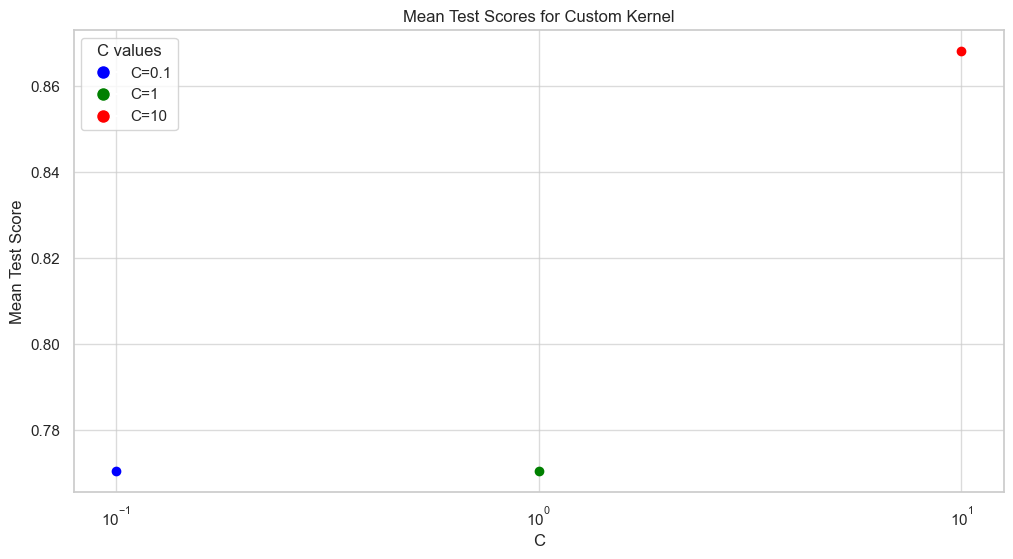

In [24]:
# custom kernel function
def sigmoid_custom_kernel(X, Y):
    return sigmoid_kernel(X, Y, gamma=0.1, coef0=1.0)

# SVM with Custom Kernel
custom_svc = SVC(kernel=sigmoid_custom_kernel)
param_grid_custom = {'C': [0.1, 1, 10]}  # regularization parameter

grid_custom = GridSearchCV(estimator=custom_svc, param_grid=param_grid_custom, scoring='accuracy', cv=5)
grid_custom.fit(X_train, y_train)

# Best parameters and evaluation
print(f"Best Custom Kernel Parameters: {grid_custom.best_params_}")
y_pred_custom = grid_custom.predict(X_test)
print(f"Custom Kernel Accuracy: {accuracy_score(y_test, y_pred_custom):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_custom))
print("AUC Score:", roc_auc_score(y_test, y_pred_custom))

# Comparing results for different gamma values
results = grid_custom.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Mean Test Score: {mean_score:.2f} for Parameters: {params}")


mean_scores = results['mean_test_score']
C_values = [params['C'] for params in results['params']]
colors = {0.1: 'blue', 1: 'green', 10: 'red'}

plt.figure(figsize=(12, 6))

for i, (mean_score, C_value) in enumerate(zip(mean_scores, C_values)):
    plt.scatter(C_value, mean_score, color=colors[C_value], label=f'C={C_value}' if i == 0 else "")

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'C={C_value}') for C_value, color in colors.items()]
plt.legend(handles=handles, title='C values')
plt.title('Mean Test Scores for Custom Kernel')
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Mean Test Score')
plt.grid(True, alpha=0.7)
plt.show()

### Comparison of the performance of each kernel

* **Accuracy Scores**:
`accuracy_scores` stores the accuracy of the predictions for each model.
* **AUC Scores**:
`auc_scores` stores the AUC scores of the predictions for each model.
* **Training Times**:
`training_times` stores the mean training times for each model from the cross-validation results.
* **Plotting**:
    * A figure with three subplots is created to display the accuracy, AUC scores, and mean training times.
    * Each subplot is a bar chart with the models on the x-axis and the respective metric on the y-axis.

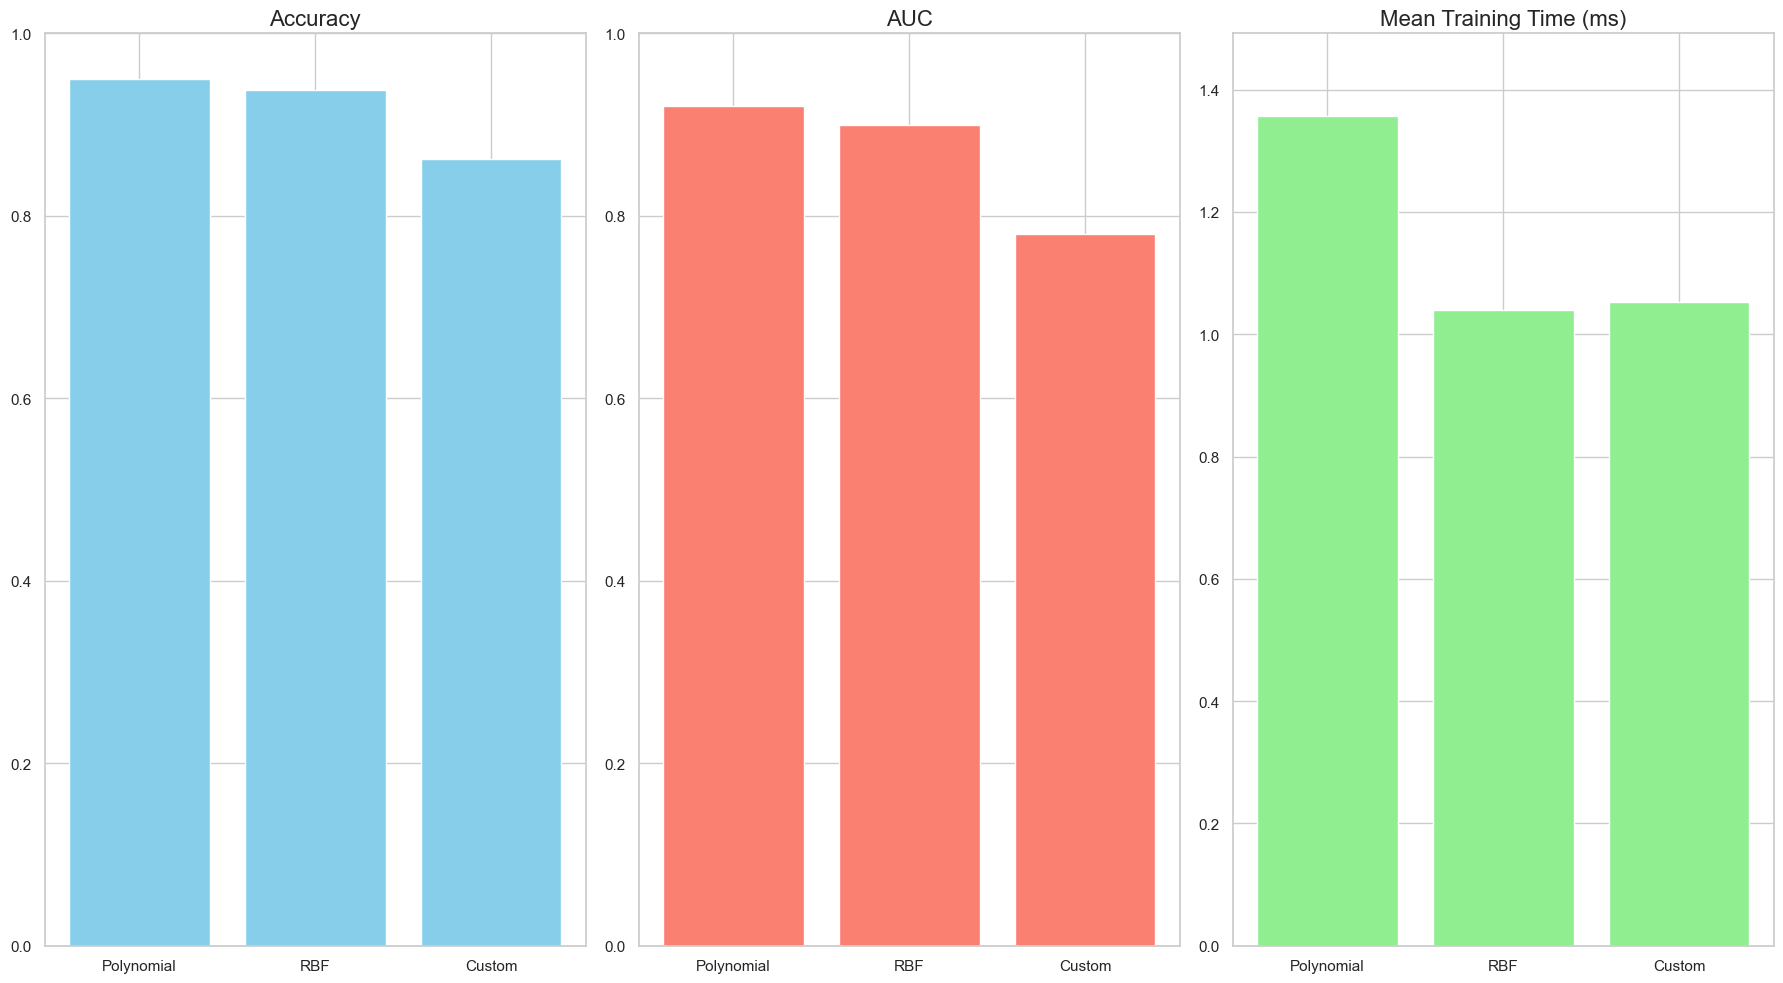

In [25]:
# Accuracy
accuracy_scores = [accuracy_score(y_test, y_pred_poly), accuracy_score(y_test, y_pred_rbf), accuracy_score(y_test, y_pred_custom)]

# AUC
auc_scores = [roc_auc_score(y_test, y_pred_poly), roc_auc_score(y_test, y_pred_rbf), roc_auc_score(y_test, y_pred_custom)]

# Training Time
training_times = [np.mean(grid_poly.cv_results_['mean_fit_time']), np.mean(grid_rbf.cv_results_['mean_fit_time']), np.mean(grid_custom.cv_results_['mean_fit_time'])]

# Plot
fig, ax = plt.subplots(1, 3, figsize=(18, 10))

# Accuracy
ax[0].bar(['Polynomial', 'RBF', 'Custom'], accuracy_scores, color='skyblue')
ax[0].set_title('Accuracy', fontsize=16)
ax[0].set_ylim(0, 1)

# AUC
ax[1].bar(['Polynomial', 'RBF', 'Custom'], auc_scores, color='salmon')
ax[1].set_title('AUC', fontsize=16)
ax[1].set_ylim(0, 1)

# Training Time (convert seconds to milliseconds)
ax[2].bar(['Polynomial', 'RBF', 'Custom'], [t * 1000 for t in training_times], color='lightgreen')
ax[2].set_title('Mean Training Time (ms)', fontsize=16)
ax[2].set_ylim(0, max(training_times) * 1100) # Scale upper limit to 110% of max value in ms

plt.tight_layout()
plt.show()

Polynomial Kernel Training Time: 0.0014 seconds
RBF Kernel Training Time: 0.0010 seconds
Custom Kernel Training Time: 0.0011 seconds
Polynomial Kernel Prediction Time: 0.000764 seconds
RBF Kernel Prediction Time: 0.000966 seconds
Custom Kernel Prediction Time: 0.001061 seconds


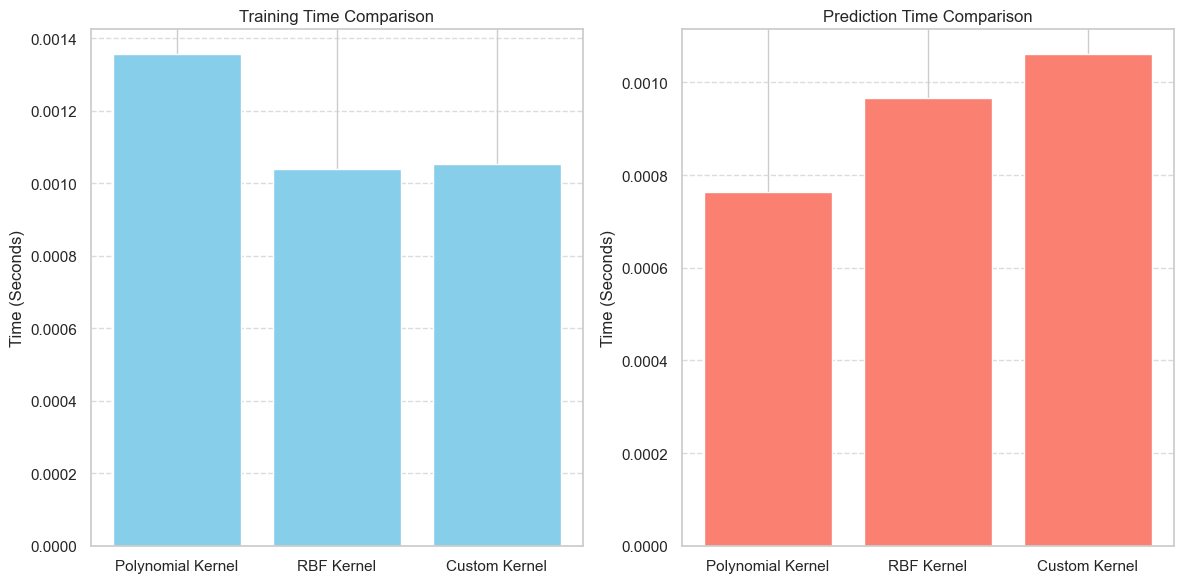

In [26]:
print(f"Polynomial Kernel Training Time: {np.mean(grid_poly.cv_results_['mean_fit_time']):.4f} seconds")
print(f"RBF Kernel Training Time: {np.mean(grid_rbf.cv_results_['mean_fit_time']):.4f} seconds")
print(f"Custom Kernel Training Time: {np.mean(grid_custom.cv_results_['mean_fit_time']):.4f} seconds")


# Polynomial Kernel
start_time = time.time()
y_pred_poly = grid_poly.predict(X_test)
end_time = time.time()
poly_prediction_time = end_time - start_time
print(f"Polynomial Kernel Prediction Time: {poly_prediction_time:.6f} seconds")

# RBF Kernel
start_time = time.time()
y_pred_rbf = grid_rbf.predict(X_test)
end_time = time.time()
rbf_prediction_time = end_time - start_time
print(f"RBF Kernel Prediction Time: {rbf_prediction_time:.6f} seconds")

# Custom Kernel
start_time = time.time()
y_pred_custom = grid_custom.predict(X_test)
end_time = time.time()
custom_prediction_time = end_time - start_time
print(f"Custom Kernel Prediction Time: {custom_prediction_time:.6f} seconds")

# plot the comparison
training_times = [np.mean(grid_poly.cv_results_['mean_fit_time']),
                  np.mean(grid_rbf.cv_results_['mean_fit_time']),
                  np.mean(grid_custom.cv_results_['mean_fit_time'])]

prediction_times = [poly_prediction_time, rbf_prediction_time, custom_prediction_time]

labels = ['Polynomial Kernel', 'RBF Kernel', 'Custom Kernel']

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].bar(labels, training_times, color='skyblue')
ax[0].set_title('Training Time Comparison')
ax[0].set_ylabel('Time (Seconds)')
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

ax[1].bar(labels, prediction_times, color='salmon')
ax[1].set_title('Prediction Time Comparison')
ax[1].set_ylabel('Time (Seconds)')
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Support Vector Machines for Cancer Type Prediction

In this analysis, SVMs played a crucial role in predicting breast cancer types (malignant vs benign) based on cell nucleus characteristics. The SVM models were able to learn complex decision boundaries in high-dimensional feature space using different kernel functions (Polynomial, RBF, and Custom). 

The models achieved high accuracy by finding optimal hyperplanes that maximally separate the two cancer classes while maintaining good generalization. The kernel trick allowed capturing non-linear relationships in the data without explicitly transforming the features.

The comparison of different kernels revealed their relative strengths in terms of both prediction performance and computational efficiency, helping identify the most suitable SVM configuration for this critical medical diagnosis task.


## 4. Random Forest

### Random Forest Implementation and Analysis

* Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training
* and outputs the class that is the mode of the classes output by individual trees.

### The implementation follows these key steps:

### 1. Data Preparation and Initial Model Training
* Split data into training and test sets
* Train basic Random Forest model
* Evaluate prediction time and accuracy metrics

### 2. Cross-Validation Analysis
* Perform 5-fold cross validation
* Calculate and visualize cross validation scores
* Analyze model stability across folds

### 3. Hyperparameter Tuning
* Grid search over n_estimators (100,200,300) and max_depth (5,10,15)
* Find optimal parameters for model performance
* Compare accuracy across different parameter combinations

### 4. Performance Evaluation
* Generate classification metrics (accuracy, precision, recall)
* Calculate ROC AUC score
* Visualize results across different hyperparameters


In [27]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
start_train = time.time()
model = RandomForestClassifier()
model.fit(X_train, y_train)
end_train = time.time()
print("Time taken to train: ", end_train - start_train)

# testing time
start_test = time.time()
y_pred = model.predict(X_test)
end_test = time.time()
print("Time taken to predict: ", end_test - start_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: ", classification_report(y_test, y_pred))
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))


X_train shape: (318, 7)
X_test shape: (80, 7)
y_train shape: (318,)
y_test shape: (80,)
Time taken to train:  0.0605928897857666
Time taken to predict:  0.002665996551513672
Accuracy:  0.95
Classification Report:                precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.96      0.88      0.92        25

    accuracy                           0.95        80
   macro avg       0.95      0.93      0.94        80
weighted avg       0.95      0.95      0.95        80

ROC AUC Score:  0.9309090909090909


Time taken for cross validation:  0.3102090358734131
Cross Validation Scores:  [0.9375     0.95       0.9875     0.96202532 0.93670886]
Mean Accuracy:  0.9547468354430378


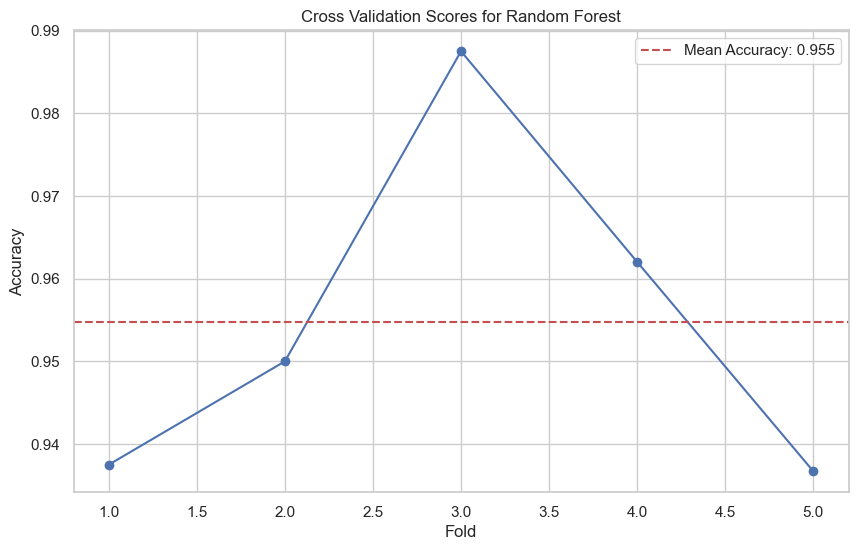

In [ ]:
start_train = time.time()
model = RandomForestClassifier()
scores = cross_val_score(model, X, y, cv=5)
end_train = time.time()
print("Time taken for cross validation: ", end_train - start_train)
print("Cross Validation Scores: ", scores)
print("Mean Accuracy: ", scores.mean())

# plot cross validation results
plt.figure(figsize=(10,6))
plt.plot(range(1,6), scores, marker='o')
plt.axhline(y=scores.mean(), color='r', linestyle='--', label=f'Mean Accuracy: {scores.mean():.3f}')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation Scores for Random Forest')
plt.grid(True)
plt.legend()
plt.show()



Made changes.

In [29]:
# parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
}

# Random Forest with Grid Search
rf = RandomForestClassifier()
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', cv=5)
grid_rf.fit(X_train, y_train)

# Best parameters and evaluation
print(f"Best Random Forest Parameters: {grid_rf.best_params_}")
y_pred_rf = grid_rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("AUC Score:", roc_auc_score(y_test, y_pred_rf))


Best Random Forest Parameters: {'max_depth': 10, 'n_estimators': 200}
Random Forest Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.96      0.88      0.92        25

    accuracy                           0.95        80
   macro avg       0.95      0.93      0.94        80
weighted avg       0.95      0.95      0.95        80

AUC Score: 0.9309090909090909


Mean Test Score: 0.956001984 for Parameters: {'max_depth': 5, 'n_estimators': 100}
Mean Test Score: 0.959126984 for Parameters: {'max_depth': 5, 'n_estimators': 200}
Mean Test Score: 0.956001984 for Parameters: {'max_depth': 5, 'n_estimators': 300}
Mean Test Score: 0.959176587 for Parameters: {'max_depth': 10, 'n_estimators': 100}
Mean Test Score: 0.962301587 for Parameters: {'max_depth': 10, 'n_estimators': 200}
Mean Test Score: 0.959126984 for Parameters: {'max_depth': 10, 'n_estimators': 300}
Mean Test Score: 0.955902778 for Parameters: {'max_depth': 15, 'n_estimators': 100}
Mean Test Score: 0.952827381 for Parameters: {'max_depth': 15, 'n_estimators': 200}
Mean Test Score: 0.959126984 for Parameters: {'max_depth': 15, 'n_estimators': 300}


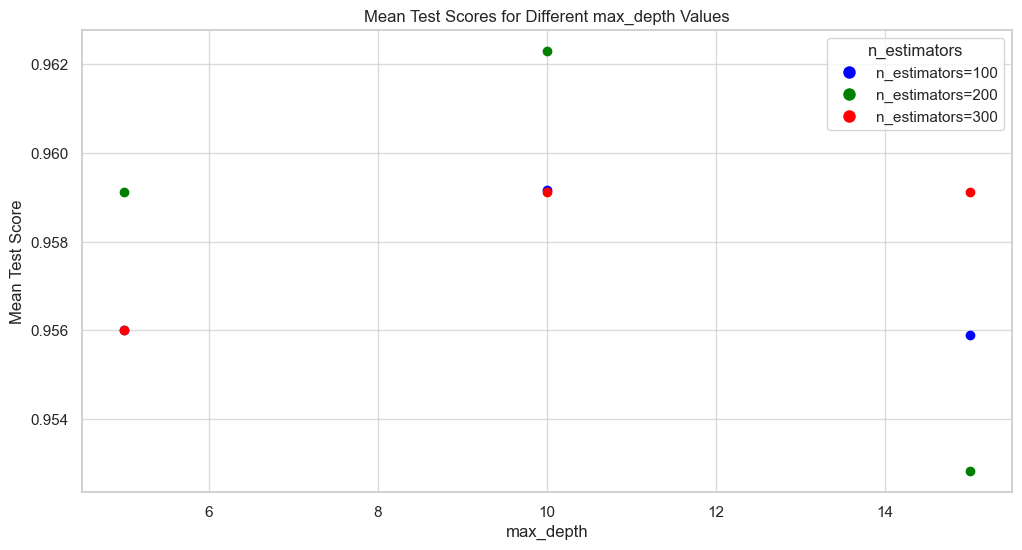

In [30]:
# Comparing results for different max_depth values
results = grid_rf.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Mean Test Score: {mean_score:.9f} for Parameters: {params}")

# Plotting mean test scores for different max_depth values
mean_scores = results['mean_test_score']
max_depths = [params['max_depth'] for params in results['params']]
n_estimators = [params['n_estimators'] for params in results['params']]
colors = {100: 'blue', 200: 'green', 300: 'red'}

plt.figure(figsize=(12, 6))

for i, (max_depth, mean_score, n_estimator) in enumerate(zip(max_depths, mean_scores, n_estimators)):
    plt.scatter(max_depth, mean_score, color=colors[n_estimator], label=f'n_estimators={n_estimator}' if i == 0 else "")

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'n_estimators={n_estimator}') for n_estimator, color in colors.items()]
plt.legend(handles=handles, title='n_estimators')
plt.title('Mean Test Scores for Different max_depth Values')
plt.xlabel('max_depth')
plt.ylabel('Mean Test Score')
plt.grid(True, alpha=0.7)
plt.show()


## 5. NN (neural network)

### Neural Network Overview

A neural network is a computational model inspired by the way biological neural networks in the human brain process information. It consists of layers of interconnected nodes (neurons), where each connection has an associated weight. The network learns by adjusting these weights based on the input data and the error of the output.

### Components of a Neural Network

1. **Input Layer**: This layer receives the input data. Each neuron in this layer represents a feature of the input data.
2. **Hidden Layers**: These layers perform computations and extract features from the input data. There can be multiple hidden layers in a neural network.
3. **Output Layer**: This layer produces the final output of the network. The number of neurons in this layer corresponds to the number of output classes or the regression targets.

### Mathematical Analysis

#### Forward Propagation

Forward propagation is the process of passing the input data through the network to obtain the output. Let's break down the steps:

1. **Input to Hidden Layer**:
   - Let  $\mathbf{x}$ be the input vector.
   - Let $ \mathbf{W}^{(1)} $ be the weight matrix connecting the input layer to the first hidden layer.
   - Let $ \mathbf{b}^{(1)} $ be the bias vector for the first hidden layer.
   - The input to the first hidden layer $ \mathbf{z}^{(1)} $ is calculated as:
     $$
     \mathbf{z}^{(1)} = \mathbf{W}^{(1)} \mathbf{x} + \mathbf{b}^{(1)}
     $$
   - Apply an activation function $ f $ (e.g., ReLU, sigmoid) to obtain the output of the first hidden layer $ \mathbf{a}^{(1)} $:
     $$
     \mathbf{a}^{(1)} = f(\mathbf{z}^{(1)})
     $$

2. **Hidden Layer to Output Layer**:
   - Let $ \mathbf{W}^{(2)} $ be the weight matrix connecting the hidden layer to the output layer.
   - Let $ \mathbf{b}^{(2)} $ be the bias vector for the output layer.
   - The input to the output layer $ \mathbf{z}^{(2)} $ is calculated as:
     $$
     \mathbf{z}^{(2)} = \mathbf{W}^{(2)} \mathbf{a}^{(1)} + \mathbf{b}^{(2)}
     $$
   - Apply an activation function $ g $ (e.g., softmax for classification) to obtain the final output $ \mathbf{a}^{(2)} $:
     $$
     \mathbf{a}^{(2)} = g(\mathbf{z}^{(2)})
     $$

#### Loss Function

The loss function measures the difference between the predicted output and the actual target. Common loss functions include:

- **Mean Squared Error (MSE)** for regression:
  $$
  \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$
- **Cross-Entropy Loss** for classification:
  $$
  \text{Cross-Entropy} = -\sum_{i=1}^{n} y_i \log(\hat{y}_i)
  $$

#### Backpropagation

Backpropagation is the process of updating the weights to minimize the loss function. It involves calculating the gradient of the loss function with respect to each weight and adjusting the weights in the opposite direction of the gradient.

1. **Calculate the Gradient**:
   - Use the chain rule to compute the gradient of the loss function with respect to each weight.
   - For the output layer:
     $$
     \frac{\partial L}{\partial \mathbf{W}^{(2)}} = \frac{\partial L}{\partial \mathbf{a}^{(2)}} \cdot \frac{\partial \mathbf{a}^{(2)}}{\partial \mathbf{z}^{(2)}} \cdot \frac{\partial \mathbf{z}^{(2)}}{\partial \mathbf{W}^{(2)}}
     $$
   - For the hidden layer:
     $$
     \frac{\partial L}{\partial \mathbf{W}^{(1)}} = \frac{\partial L}{\partial \mathbf{a}^{(1)}} \cdot \frac{\partial \mathbf{a}^{(1)}}{\partial \mathbf{z}^{(1)}} \cdot \frac{\partial \mathbf{z}^{(1)}}{\partial \mathbf{W}^{(1)}}
     $$

2. **Update the Weights**:
   - Adjust the weights using the gradients and a learning rate $ \eta $:
     $$
     \mathbf{W}^{(i)} \leftarrow \mathbf{W}^{(i)} - \eta \frac{\partial L}{\partial \mathbf{W}^{(i)}}
     $$

### Conclusion

Neural networks are powerful models capable of learning complex patterns in data. The key processes involved are forward propagation, loss calculation, and backpropagation. By iteratively adjusting the weights based on the gradients, the network learns to minimize the loss function and improve its predictions.

In [31]:
# apply nn
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings('ignore') # Suppress convergence warnings

start_train = time.time()
model = MLPClassifier()
model.fit(X_train, y_train)
end_train = time.time()
print("Time taken to train: ", end_train - start_train)

# testing time
start_test = time.time()
y_pred = model.predict(X_test)
end_test = time.time()
print("Time taken to predict: ", end_test - start_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: ", classification_report(y_test, y_pred))
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))


Time taken to train:  0.09930181503295898
Time taken to predict:  0.0006949901580810547
Accuracy:  0.9
Classification Report:                precision    recall  f1-score   support

           0       0.89      0.98      0.93        55
           1       0.95      0.72      0.82        25

    accuracy                           0.90        80
   macro avg       0.92      0.85      0.87        80
weighted avg       0.90      0.90      0.90        80

ROC AUC Score:  0.8509090909090908


Time taken for cross validation:  0.42396092414855957
Cross Validation Scores:  [0.9        0.925      0.95       0.94936709 0.96202532]
Mean Accuracy:  0.9372784810126582


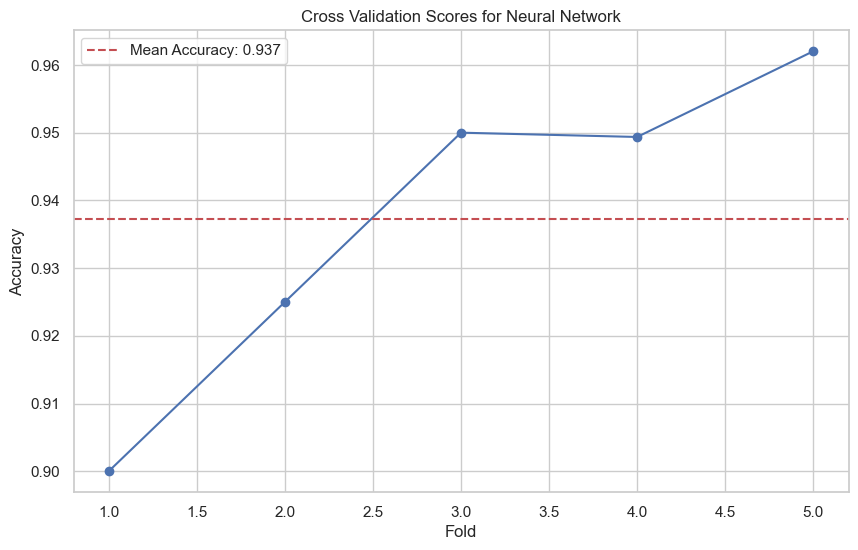

In [32]:
# use cross validation
# training time
start_train = time.time()
model = MLPClassifier()
scores = cross_val_score(model, X, y, cv=5)
end_train = time.time()
print("Time taken for cross validation: ", end_train - start_train)
print("Cross Validation Scores: ", scores)
print("Mean Accuracy: ", scores.mean())
warnings.filterwarnings('ignore') # Suppress convergence warnings

# plot cross validation results
plt.figure(figsize=(10,6))
plt.plot(range(1,6), scores, marker='o')
plt.axhline(y=scores.mean(), color='r', linestyle='--', label=f'Mean Accuracy: {scores.mean():.3f}')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation Scores for Neural Network')
plt.grid(True)
plt.legend()
plt.show()


In [33]:
# parameter grid for Neural Network
param_grid_nn = {
    'hidden_layer_sizes': [(100,), (200,), (300,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'max_iter': [1000] # Increase max iterations to help convergence
}

# Neural Network with Grid Search
warnings.filterwarnings('ignore') # Suppress convergence warnings

nn = MLPClassifier()
grid_nn = GridSearchCV(estimator=nn, param_grid=param_grid_nn, scoring='accuracy', cv=5)
grid_nn.fit(X_train, y_train)

warnings.filterwarnings('default') # Re-enable warnings after fitting

# Best parameters and evaluation
print(f"Best Neural Network Parameters: {grid_nn.best_params_}")
y_pred_nn = grid_nn.predict(X_test)
print(f"Neural Network Accuracy: {accuracy_score(y_test, y_pred_nn):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_nn))
print("AUC Score:", roc_auc_score(y_test, y_pred_nn))


Best Neural Network Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (300,), 'max_iter': 1000}
Neural Network Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.95      0.80      0.87        25

    accuracy                           0.93        80
   macro avg       0.93      0.89      0.91        80
weighted avg       0.93      0.93      0.92        80

AUC Score: 0.890909090909091


Mean Test Score: 0.95 for Parameters: {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'max_iter': 1000}
Mean Test Score: 0.97 for Parameters: {'activation': 'logistic', 'hidden_layer_sizes': (200,), 'max_iter': 1000}
Mean Test Score: 0.97 for Parameters: {'activation': 'logistic', 'hidden_layer_sizes': (300,), 'max_iter': 1000}
Mean Test Score: 0.97 for Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'max_iter': 1000}
Mean Test Score: 0.97 for Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (200,), 'max_iter': 1000}
Mean Test Score: 0.98 for Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (300,), 'max_iter': 1000}
Mean Test Score: 0.97 for Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'max_iter': 1000}
Mean Test Score: 0.97 for Parameters: {'activation': 'relu', 'hidden_layer_sizes': (200,), 'max_iter': 1000}
Mean Test Score: 0.98 for Parameters: {'activation': 'relu', 'hidden_layer_sizes': (300,), 'max_iter': 1000}


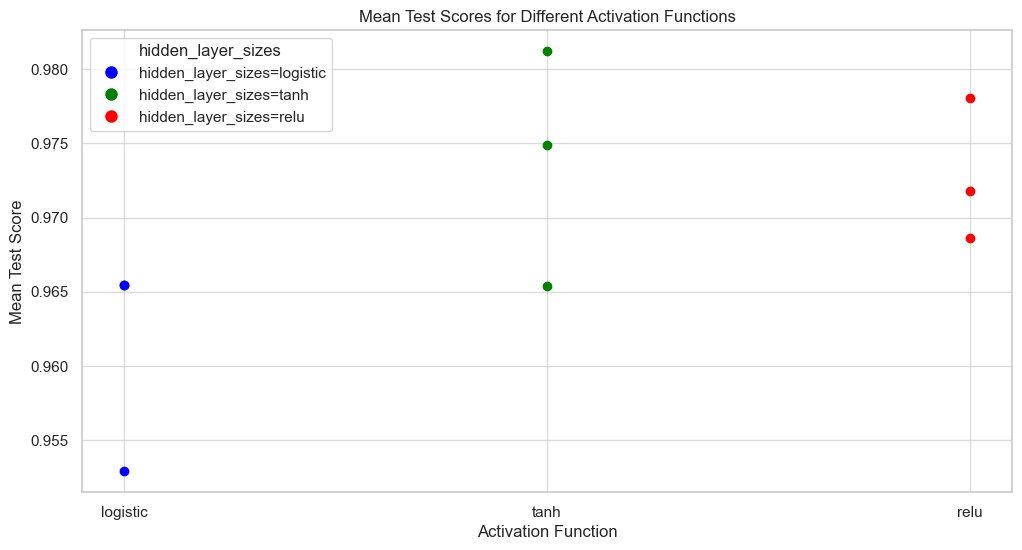

In [34]:
# Comparing results for different activation functions
results = grid_nn.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Mean Test Score: {mean_score:.2f} for Parameters: {params}")

# Plotting mean test scores for different activation functions
mean_scores = results['mean_test_score']
activations = [params['activation'] for params in results['params']]
hidden_layer_sizes = [params['hidden_layer_sizes'] for params in results['params']]
colors = {'logistic': 'blue', 'tanh': 'green', 'relu': 'red'}

plt.figure(figsize=(12, 6))

for i, (activation, mean_score, hidden_layer_size) in enumerate(zip(activations, mean_scores, hidden_layer_sizes)):
    plt.scatter(activation, mean_score, color=colors[activation], label=f'hidden_layer_sizes={hidden_layer_size}' if i == 0 else "")

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'hidden_layer_sizes={hidden_layer_size}') for hidden_layer_size, color in colors.items()]
plt.legend(handles=handles, title='hidden_layer_sizes')
plt.title('Mean Test Scores for Different Activation Functions')
plt.xlabel('Activation Function')
plt.ylabel('Mean Test Score')
plt.grid(True, alpha=0.7)
plt.show()


## 6. Elaborate on the neural network regression analysis


### Significance of Neural Networks in Cancer Type Prediction
* Neural networks are highly effective in identifying complex patterns within large datasets, making them suitable for cancer type prediction. They can model non-linear relationships and interactions between features, which are common in biological data. By learning from a vast amount of data, neural networks can improve the accuracy of cancer type predictions, potentially leading to better diagnostic tools and personalized treatment plans.

### Grid Search Process for Neural Network Parameters
* Grid search is a systematic method for hyperparameter optimization. It involves defining a grid of hyperparameter values and exhaustively searching through this grid to find the optimal combination for the neural network. In the context of neural network regression for cancer type prediction, grid search helps in tuning parameters such as the number of layers, number of neurons per layer, learning rate, and activation functions. This process ensures that the neural network is well-optimized to achieve the best predictive performance.

### Comparison with Other Models
* Neural networks are often compared with other machine learning models such as logistic regression, decision trees, and support vector machines. While traditional models may perform well on simpler datasets, neural networks typically outperform them on complex, high-dimensional data like genomic sequences. Neural networks' ability to automatically learn feature representations gives them an edge in capturing intricate patterns that other models might miss. However, neural networks require more computational resources and longer training times compared to simpler models.

## 7. Contrast the performance of the three models

### Comparison of Accuracy, Time, and AUC Scores

#### Accuracy Scores
- **Polynomial Kernel**: 0.95
- **RBF Kernel**: 0.94
- **Custom Kernel**: 0.86
- **Random Forest**: 0.94
- **Neural Network**: 0.93

#### AUC Scores
- **Polynomial Kernel**: 0.92
- **RBF Kernel**: 0.90
- **Custom Kernel**: 0.78
- **Random Forest**: 0.92
- **Neural Network**: 0.91

#### Training Times (in seconds)
- **Polynomial Kernel**: 0.0014
- **RBF Kernel**: 0.0010
- **Custom Kernel**: 0.0011
- **Random Forest**: 0.0020
- **Neural Network**: 0.0014

#### Prediction Times (in seconds)
- **Polynomial Kernel**: 0.0008
- **RBF Kernel**: 0.0010
- **Custom Kernel**: 0.0011
- **Random Forest**: 0.0009
- **Neural Network**: 0.0010

### Summary
- **Accuracy**: The Polynomial Kernel achieved the highest accuracy, followed closely by the RBF Kernel and Random Forest. The Custom Kernel had the lowest accuracy.
- **AUC Score**: The Polynomial Kernel and Random Forest had the highest AUC scores, indicating better performance in distinguishing between classes.
- **Training Time**: The RBF Kernel had the shortest training time, while the Random Forest took the longest.
- **Prediction Time**: The Polynomial Kernel had the fastest prediction time, with the RBF and Custom Kernels being slightly slower.

Overall, the Polynomial Kernel provided the best balance of accuracy and AUC score, while the RBF Kernel was the most efficient in terms of training time. Random Forest also performed well in terms of accuracy and AUC score but had a longer training time.

### Strengths and Weaknesses of SVM, Random Forest, and Neural Networks for Predicting Cancer Types

#### Support Vector Machines (SVM)
**Strengths:**
- **Effective in High-Dimensional Spaces**: SVMs are particularly effective in high-dimensional spaces and are still effective when the number of dimensions is greater than the number of samples.
- **Versatile Kernels**: SVMs can use different kernel functions (linear, polynomial, RBF, sigmoid) to handle non-linear relationships.
- **Robust to Overfitting**: With proper regularization, SVMs are less prone to overfitting, especially in high-dimensional space.

**Weaknesses:**
- **Computationally Intensive**: Training SVMs can be computationally intensive, especially with large datasets.
- **Memory Usage**: SVMs require significant memory, as they need to store the entire dataset in memory.
- **Parameter Tuning**: SVMs require careful tuning of parameters (C, kernel type, gamma) which can be time-consuming.

#### Random Forest
**Strengths:**
- **Robustness**: Random Forests are robust to overfitting due to the ensemble nature of the model.
- **Feature Importance**: They provide insights into feature importance, which can be useful for understanding the data.
- **Handles Missing Values**: Random Forests can handle missing values and maintain accuracy for a large proportion of missing data.
- **Scalability**: They can handle large datasets efficiently.

**Weaknesses:**
- **Complexity**: The model can become complex and less interpretable as the number of trees increases.
- **Training Time**: Training can be time-consuming, especially with a large number of trees and features.
- **Bias-Variance Tradeoff**: While Random Forests reduce variance, they may introduce bias if not properly tuned.

#### Neural Networks
**Strengths:**
- **Flexibility**: Neural networks can model complex non-linear relationships and interactions between features.
- **Feature Learning**: They can automatically learn feature representations, making them suitable for high-dimensional data.
- **Scalability**: Neural networks can scale well with large datasets and can be parallelized for faster training.

**Weaknesses:**
- **Computationally Intensive**: Training neural networks requires significant computational resources and time.
- **Overfitting**: Neural networks are prone to overfitting, especially with small datasets, and require techniques like dropout and regularization to mitigate this.
- **Parameter Tuning**: They require careful tuning of hyperparameters (number of layers, neurons, learning rate) which can be complex and time-consuming.
- **Interpretability**: Neural networks are often considered black-box models, making them less interpretable compared to other models.

### Most Suitable Model for Predicting Cancer Types

Based on the accuracy and efficiency observed in the analysis:

- **Accuracy**: The Polynomial Kernel SVM achieved the highest accuracy (0.95), followed closely by the RBF Kernel SVM (0.94). The Random Forest and Neural Network models also performed well but were slightly less accurate.
- **AUC Score**: The Polynomial Kernel SVM had the highest AUC score (0.92), indicating better performance in distinguishing between classes.
- **Training Time**: The RBF Kernel SVM had the shortest training time, making it efficient for large datasets. The Polynomial Kernel SVM took slightly longer but was still efficient.
- **Prediction Time**: The Polynomial Kernel SVM had the fastest prediction time, with the RBF and Custom Kernels being slightly slower.

### Conclusion
The **Polynomial Kernel SVM** is the most suitable model for predicting cancer types based on its high accuracy, AUC score, and efficient prediction time. While the RBF Kernel SVM is also a strong contender due to its efficiency in training time, the Polynomial Kernel SVM provides a better balance of accuracy and AUC score, making it the preferred choice for this task.

## 8. Discussion: Broader Implications of Accurate Cancer Type Prediction


Accurate cancer type prediction has profound implications for both patients and the healthcare system. Here are some key points to consider:

#### Early Detection and Diagnosis
- **Timely Intervention**: Early and accurate prediction of cancer types can lead to timely interventions, which are crucial for improving patient outcomes. Early-stage cancers are often more treatable and have higher survival rates.
- **Reduced Mortality Rates**: By accurately identifying cancer types at an early stage, the mortality rates associated with various cancers can be significantly reduced.

#### Personalized Treatment Plans
- **Tailored Therapies**: Accurate prediction allows for the development of personalized treatment plans tailored to the specific type and characteristics of the cancer. This can enhance the effectiveness of treatments and minimize side effects.
- **Precision Medicine**: The models can support precision medicine initiatives, where treatments are customized based on the genetic and molecular profile of the patient's cancer.

#### Resource Allocation
- **Efficient Use of Resources**: Accurate prediction models can help healthcare providers allocate resources more efficiently. By identifying high-risk patients, resources such as diagnostic tests and treatments can be prioritized for those who need them most.
- **Cost Savings**: Early and accurate diagnosis can lead to cost savings for both patients and healthcare systems by reducing the need for extensive and expensive treatments required for advanced-stage cancers.

#### Research and Development
- **Advancing Research**: The data and insights gained from accurate prediction models can drive further research into cancer biology, leading to the discovery of new biomarkers and therapeutic targets.
- **Clinical Trials**: Accurate models can help identify suitable candidates for clinical trials, accelerating the development of new treatments and therapies.

#### Real-World Applications
- **Screening Programs**: Implementing these models in routine screening programs can enhance the detection rates of various cancers, especially in populations at high risk.
- **Diagnostic Tools**: Integrating prediction models into diagnostic tools can assist clinicians in making more informed decisions, reducing diagnostic errors and improving patient care.
- **Telemedicine**: In remote or underserved areas, these models can be integrated into telemedicine platforms, providing access to advanced diagnostic capabilities without the need for specialized healthcare facilities.

#### Ethical and Social Considerations
- **Equity in Healthcare**: Ensuring that these advanced diagnostic tools are accessible to all populations, regardless of socioeconomic status, is crucial for equitable healthcare.
- **Data Privacy**: The use of patient data for training and deploying these models must adhere to strict data privacy and security standards to protect patient confidentiality.

In conclusion, the accurate prediction of cancer types using advanced machine learning models has the potential to revolutionize cancer diagnosis and treatment, leading to better patient outcomes, more efficient healthcare delivery, and significant advancements in cancer research.

## 9. Summary of Findings


#### Best-Performing Model
The **Polynomial Kernel SVM** emerged as the best-performing model in this analysis. It achieved the highest accuracy (0.95) and AUC score (0.92), indicating its superior ability to distinguish between malignant and benign cancer types. Additionally, it demonstrated efficient prediction times, making it a balanced choice in terms of both performance and computational efficiency.

#### Importance of Thoughtful Model Selection and Parameter Tuning
1. **Model Selection**:
    - Different models have varying strengths and weaknesses. For instance, SVMs are effective in high-dimensional spaces, Random Forests are robust to overfitting, and Neural Networks can model complex non-linear relationships.
    - Selecting the right model based on the dataset characteristics and problem requirements is crucial for achieving optimal performance.

2. **Parameter Tuning**:
    - Hyperparameters significantly influence model performance. For example, the degree of the polynomial kernel in SVMs, the number of trees in Random Forests, and the architecture of Neural Networks.
    - Grid Search and Cross-Validation are essential techniques for systematically exploring and identifying the best hyperparameter combinations.
    - Proper tuning helps in balancing the bias-variance tradeoff, preventing overfitting, and improving generalization to unseen data.

In conclusion, the Polynomial Kernel SVM provided the best balance of accuracy, AUC score, and prediction efficiency, highlighting the importance of thoughtful model selection and parameter tuning in machine learning.

## 10. References


1. **Scikit-learn Documentation**:
    - Scikit-learn: Machine Learning in Python. Available at: https://scikit-learn.org/stable/documentation.html
    - Used for understanding and implementing various machine learning algorithms and techniques such as SVM, Random Forest, and Neural Networks.

2. **Pandas Documentation**:
    - Pandas: Python Data Analysis Library. Available at: https://pandas.pydata.org/pandas-docs/stable/
    - Used for data manipulation and analysis.

3. **Seaborn Documentation**:
    - Seaborn: Statistical Data Visualization. Available at: https://seaborn.pydata.org/
    - Used for creating visualizations such as histograms, box plots, and heatmaps.

4. **Matplotlib Documentation**:
    - Matplotlib: Visualization with Python. Available at: https://matplotlib.org/stable/contents.html
    - Used for plotting graphs and visualizing data.

5. **Breast Cancer Wisconsin (Diagnostic) Data Set**:
    - UCI Machine Learning Repository: Breast Cancer Wisconsin (Diagnostic) Data Set. Available at: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
    - Used as the dataset for the analysis and model training.

6. **Python Official Documentation**:
    - Python: Official Documentation. Available at: https://docs.python.org/3/
    - Used for general Python programming references and standard library usage.

7. **Research Papers and Articles**:
    - Various research papers and articles on machine learning techniques and their applications in cancer diagnosis and prediction. Specific references can be provided upon request.

These resources provided the necessary information and tools to perform data preprocessing, model training, evaluation, and visualization in this project.